<center>
    
## Project Type: Machine Learning
### Курсовой проект по курсу GeekBrains: Библиотеки Python для Data Science: продолжение

### Project Number: 2
# Project Title: Кредитный скоринг 

---

<center>
    
# **STAGE 1. PROBLEM DEFINITION**
    




### Project Objectives

---

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета

### Success criteria

---

#### Наименование файлов с данными

- course_project_train.csv - обучающий датасет
- course_project_test.csv - тестовый датасет

#### Целевая переменная

Credit Default - факт невыполнения кредитных обязательств

#### Метрика качества

F1-score (sklearn.metrics.f1_score)

#### Требования к решению

_Целевая метрика_

- F1 > 0.5
- Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

### Task type

---

Задача кредитного скоринга относится к классу задач классфикикации. 

<center>
    
# **STAGE 2. DATA WRANGLING**



### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Import Data

---

In [2]:
data_path = 'D:/Data_Science_Project/Курс GB - Библиотеки Python для Data Science продолжение/course_project_train.csv'

# data_path = '/media/ruslan/Data/Data_Science_Project/Курс GB - Библиотеки Python для Data Science продолжение/course_project_train.csv'

<center>
    
# Section 1.  Data Understanding

### _Collect initial data_

---

In [3]:
# Загрузим тренировочный набор даннх для первичного визуального анализа 
train_data = pd.read_csv(data_path)
train_data.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [4]:
train_data.tail().T

7495                7496         7497  \
Home Ownership                      Rent       Home Mortgage         Rent   
Annual Income                     402192         1.53398e+06  1.87891e+06   
Years in current job            < 1 year              1 year      6 years   
Tax Liens                              0                   0            0   
Number of Open Accounts                3                  10           12   
Years of Credit History              8.5                26.5         32.1   
Maximum Open Credit               107866              686312  1.77892e+06   
Number of Credit Problems              0                   0            0   
Months since last delinquent         NaN                  43          NaN   
Bankruptcies                           0                   0            0   
Purpose                            other  debt consolidation    buy a car   
Term                          Short Term           Long Term   Short Term   
Current Loan Amount               129360              444048        1e+08   
Current Credit Balance             73492              456399       477812   
Monthly Debt                        1900               12783        12479   
Credit Score                         697                7410          748   
Credit Default                         0                   1            0   

                                            7498                7499  
Home Ownership                     Home Mortgage                Rent  
Annual Income                                NaN                 NaN  
Years in current job                         NaN             4 years  
Tax Liens                                      0                   0  
Number of Open Accounts                       21                   8  
Years of Credit History                     26.5                 9.4  
Maximum Open Credit                  1.14125e+06              480832  
Number of Credit Problems                      0                   0  
Months since last delinquent                 NaN                 NaN  
Bankruptcies                                   0                   0  
Purpose                       debt consolidation  debt consolidation  
Term                                  Short Term          Short Term  
Current Loan Amount                       615274               26928  
Current Credit Balance                    476064              288192  
Monthly Debt                               37118                9061  
Credit Score                                 NaN                 NaN  
Credit Default                                 0                   0

Первичный визуальный анализ показывает, что в тренировочном наборе имеются ряд категориальных перменных, рад колличественных перменных, пропущенные значения, нулевые значения, названия переменных содержат пробелы. 

Проведем дальнейшие начальные исследования набора данных. 

In [5]:
# Форма исходного набора данных
print("Форма исходного набора данных:\n{}".format(train_data.shape))

Форма исходного набора данных:
(7500, 17)


In [6]:
# Список столбцов
train_data.columns.tolist()

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default']

In [7]:
# Анализ типов данных
train_data.dtypes 

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [8]:
# Общая информация о наборе данных 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### Выводы

- Набор имеет 17 переменных и 7500 наблюдений.
- В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500. 
- Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
- Переменная Credit Default имеет тип данных int64.
- Оставшиеся 12 переменных имеют тип данныз float64.

### _Describe data_

---

#### Описание датасета

1. Home Ownership - домовладение
1. Annual Income - годовой доход
1. Years in current job - количество лет на текущем месте работы
1. Tax Liens - налоговые обременения
1. Number of Open Accounts - количество открытых счетов
1. Years of Credit History - количество лет кредитной истории
1. Maximum Open Credit - наибольший открытый кредит
1. Number of Credit Problems - количество проблем с кредитом
1. Months since last delinquent - количество месяцев с последней просрочки платежа
1. Bankruptcies - банкротства
1. Purpose - цель кредита
1. Term - срок кредита
1. Current Loan Amount - текущая сумма кредита
1. Current Credit Balance - текущий кредитный баланс
1. Monthly Debt - ежемесячный долг
1. Credit Score -  кредитная оценка 
1. Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

#### Описание типов переменных

- Home Ownership - _категориальная перменная_ 
- Annual Income - **количественная переменная** 
- Years in current job - _категориальная перменная_
- Tax Liens - _категориальная перменная_
- Number of Open Accounts - **количественная переменная**
- Years of Credit History -  **количественная переменная**
- Maximum Open Credit - **количественная переменная**
- Number of Credit Problems - **количественная переменная** или _категориальная перменная_ - необходим дальнейший анализ 
- Months since last delinquent - **количественная переменная**
- Bankruptcies - банкротства - **количественная переменная** или _категориальная перменная_ - необходим дальнейший анализ 
- Purpose -  _категориальная перменная_
- Term - _категориальная перменная_
- Current Loan Amount - **количественная переменная**
- Current Credit Balance - **количественная переменная**
- Monthly Debt - **количественная переменная**
- Credit Score - **количественная переменная**
- Credit Default - _категориальная перменная_

**Итого**
- Категориальные переменные
    1. Home Ownership
    1. Years in current job
    1. Tax Liens
    1. Purpose
    1. Term
    1. Credit Default
- Количественные переменные
    1. Annual Income
    1. Number of Open Accounts
    1. Years of Credit History
    1. Maximum Open Credit
    1. Months since last delinquent
    1. Current Loan Amount
    1. Current Credit Balance
    1. Monthly Debt
    1. Credit Score
- Требуются дополнительные исследования 
    1. Number of Credit Problems
    1. Bankruptcies

### _Verify data quality_

---

In [9]:
# Функция коплексной оценки качества данных 
def verify_data_quality (evaluated_dataset):
    # Проверка типов данных
    print("Типы данных:\n{}\n".format(evaluated_dataset.dtypes))
    # Проверка наличия значений NaN
    print("Пропущенные значения:\n{}\n".format(evaluated_dataset.isnull().sum().sum()))
    # Количество значений, отличных от NaN
    print("Количество значений, отличных от NaN:\n{}\n".format(evaluated_dataset.count().sum()))
    # Поиск дублирующих строк 
    print("Дублирующих строк:\n{}\n".format(evaluated_dataset.duplicated().sum()))
    # Форма нарбора данных
    print("Форма нарбора данных:\n{}\n".format(evaluated_dataset.shape))
    # Тип индекса набора данных
    print("Тип индекса набора данных:\n{}\n".format(evaluated_dataset.index))

In [10]:
# Оценка качетва данных
verify_data_quality(train_data)

Типы данных:
Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

Пропущенные значения:
7580

Количество значений, отличных от NaN:
119920

Дублирующих строк:
0

Форма нарбора данных:
(7500, 17)

Тип индекса набора данных:
RangeIndex(start=0, stop=7500, step=1)



### _Conclusions_

---

Тренировочный набор данных имеет:

- 6 катеориальных переменных
- 9 колличественных переменных 
- 2 переменные которые можно оценить как категориальные так и числовые, необходим дальнейший анализ
- Набор имеет 17 переменных и 7500 наблюдений.
- В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500. 
- Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
- Переменная Credit Default имеет тип данных int64.
- Оставшиеся 12 переменных имеют тип данныз float64.
-  7580 пропущенных значений 
- 119920 отличных от NaN
- Дублирующих строк нет 
- Индекс типа RangeIndex, непрерывный с шагом 1 

<center>

# Section 2. Data Preparation

## **Clean data**

---
***

### _Renaming_

---

Имена переменных начинаются с большой буквы и содержат пробелы, для корректной работы  переименуем перменные к стандартной форме. 

In [11]:
# Приведение имен переменных к принятой для анализа форме 
train_data.columns = [i.replace(' ', '_').lower() for i in train_data.columns]

In [12]:
# Проверка результата переиминования
train_data.columns.tolist()

['home_ownership',
 'annual_income',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'number_of_credit_problems',
 'months_since_last_delinquent',
 'bankruptcies',
 'purpose',
 'term',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'credit_default']

### _Data type conversions_

---

Перед приведением типов данных согласно типу переменной дополнительно проанлизируем перменные bankruptcies и number_of_credit_problems  с целью уточнения типа переменной. 

**number_of_credit_problems**

In [13]:
# Анализ уникальных значений 
train_data['number_of_credit_problems'].unique()

array([1., 0., 3., 2., 6., 4., 5., 7.])

In [14]:
# Колличество значений 
train_data['number_of_credit_problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: number_of_credit_problems, dtype: int64

Фактически переменная number_of_credit_problems является категориальной порядковой переменной принимающей значения от 0 до 7.

 **bankruptcies** 

In [15]:
# Анализ уникальных значений 
train_data['bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.])

In [16]:
# Колличество значений 
train_data['bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: bankruptcies, dtype: int64

Переменная bankruptcies так же является категориальной порядковой переменной принимающей значения от 0 до 4.

После уточнения типов премеменных получаем следующий результат.

**Категориальные переменные**

1. home_ownership
1. years_in_current_job
1. tax_liens
1. number_of_credit_problems
1. bankruptcies
1. purpose
1. term
1. credit_default


**Колличественные переменные**

1. annual_income
1. number_of_open_accounts
1. years_of_credit_history
1. maximum_open_credit
1. months_since_last_delinquent
1. current_loan_amount
1. current_credit_balance
1. monthly_debt
1. credit_score


#### Исследуем категориальные переменные

In [17]:
# Создадим отлельный набор для категориальных пепеменных
train_data_cat = train_data[['home_ownership',
                             'years_in_current_job',
                             'tax_liens',
                             'number_of_credit_problems',
                             'bankruptcies',
                             'purpose',
                             'term',
                             'credit_default']]

In [18]:
train_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home_ownership             7500 non-null   object 
 1   years_in_current_job       7129 non-null   object 
 2   tax_liens                  7500 non-null   float64
 3   number_of_credit_problems  7500 non-null   float64
 4   bankruptcies               7486 non-null   float64
 5   purpose                    7500 non-null   object 
 6   term                       7500 non-null   object 
 7   credit_default             7500 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 468.9+ KB


In [19]:
train_data_cat.head()

home_ownership years_in_current_job  tax_liens  number_of_credit_problems  \
0       Own Home                  NaN        0.0                        1.0   
1       Own Home            10+ years        0.0                        0.0   
2  Home Mortgage              8 years        0.0                        0.0   
3       Own Home              6 years        0.0                        1.0   
4           Rent              8 years        0.0                        1.0   

   bankruptcies             purpose        term  credit_default  
0           1.0  debt consolidation  Short Term               0  
1           0.0  debt consolidation   Long Term               1  
2           0.0  debt consolidation  Short Term               0  
3           1.0  debt consolidation  Short Term               0  
4           0.0  debt consolidation  Short Term               0

- Переменные home_ownership, purpose, term имеют словестное выражение. 
- Переменная years_in_current_job имеет смешанное словестно \ численное представление. 
- Переменные tax_liens, number_of_credit_problems, bankruptcies, credit_default имеют численное представление. 

In [20]:
# Приведем переменные к типу данных category
train_data_cat = train_data_cat.astype('category')

In [21]:
# Оценим получившийся результат
train_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   home_ownership             7500 non-null   category
 1   years_in_current_job       7129 non-null   category
 2   tax_liens                  7500 non-null   category
 3   number_of_credit_problems  7500 non-null   category
 4   bankruptcies               7486 non-null   category
 5   purpose                    7500 non-null   category
 6   term                       7500 non-null   category
 7   credit_default             7500 non-null   category
dtypes: category(8)
memory usage: 61.2 KB


#### Исследуем колличественные переменные

In [22]:
# Создадим отлельный набор для колличественных пепеменных
train_data_num = train_data[['annual_income',
                             'number_of_open_accounts',
                             'years_of_credit_history',
                             'maximum_open_credit',
                             'months_since_last_delinquent',
                             'current_loan_amount',
                             'current_credit_balance',
                             'monthly_debt',
                             'credit_score']]

In [23]:
train_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   annual_income                 5943 non-null   float64
 1   number_of_open_accounts       7500 non-null   float64
 2   years_of_credit_history       7500 non-null   float64
 3   maximum_open_credit           7500 non-null   float64
 4   months_since_last_delinquent  3419 non-null   float64
 5   current_loan_amount           7500 non-null   float64
 6   current_credit_balance        7500 non-null   float64
 7   monthly_debt                  7500 non-null   float64
 8   credit_score                  5943 non-null   float64
dtypes: float64(9)
memory usage: 527.5 KB


In [24]:
train_data_num.head()

annual_income  number_of_open_accounts  years_of_credit_history  \
0       482087.0                     11.0                     26.3   
1      1025487.0                     15.0                     15.3   
2       751412.0                     11.0                     35.0   
3       805068.0                      8.0                     22.5   
4       776264.0                     13.0                     13.6   

   maximum_open_credit  months_since_last_delinquent  current_loan_amount  \
0             685960.0                           NaN           99999999.0   
1            1181730.0                           NaN             264968.0   
2            1182434.0                           NaN           99999999.0   
3             147400.0                           NaN             121396.0   
4             385836.0                           NaN             125840.0   

   current_credit_balance  monthly_debt  credit_score  
0                 47386.0        7914.0         749.0  
1                394972.0       18373.0         737.0  
2                308389.0       13651.0         742.0  
3                 95855.0       11338.0         694.0  
4                 93309.0        7180.0         719.0

In [25]:
train_data_num.tail()

annual_income  number_of_open_accounts  years_of_credit_history  \
7495       402192.0                      3.0                      8.5   
7496      1533984.0                     10.0                     26.5   
7497      1878910.0                     12.0                     32.1   
7498            NaN                     21.0                     26.5   
7499            NaN                      8.0                      9.4   

      maximum_open_credit  months_since_last_delinquent  current_loan_amount  \
7495             107866.0                           NaN             129360.0   
7496             686312.0                          43.0             444048.0   
7497            1778920.0                           NaN           99999999.0   
7498            1141250.0                           NaN             615274.0   
7499             480832.0                           NaN              26928.0   

      current_credit_balance  monthly_debt  credit_score  
7495                 73492.0        1900.0         697.0  
7496                456399.0       12783.0        7410.0  
7497                477812.0       12479.0         748.0  
7498                476064.0       37118.0           NaN  
7499                288192.0        9061.0           NaN

Колличественные переменные переменные имеют идентичный тип данных float64 и в дополнительных манипуляциях не нуждаются. 

### _Categorical encoding_

---

Для использования категориальных переменных в моделях классификации необходимо закодировать значение каждой переменной в цифровой вид. Для этого необходимо произвести более детальный анализ, классификацию и перекодировку.

Введем следующие обозначение типов категориальных перменных. 
- Бинарные
- Номинальные 
- Порядковые

In [26]:
# Список категориальных пермемнных
train_data_cat.columns.to_list()

['home_ownership',
 'years_in_current_job',
 'tax_liens',
 'number_of_credit_problems',
 'bankruptcies',
 'purpose',
 'term',
 'credit_default']

##### home_ownership

In [27]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['home_ownership'].sort_values().unique().to_list()))

Уникальные значения переменной:
['Have Mortgage', 'Home Mortgage', 'Own Home', 'Rent']


Значение перемеременной Have Mortgage и Home Mortgage фактически отражают один и тот же аспект реальности наличие дома в ипотеку, поэтому их можно объеденить в один признак. Тогда у нас останиться три признака "Mortgage', 'Own Home', 'Rent'.

In [28]:
# Словарь для кодирования перменной 
home_ownership_dict = {'Have Mortgage' : 0,
                       'Home Mortgage' : 0,  
                            'Own Home' : 1, 
                                'Rent' : 2}

In [29]:
# Кодирование перменной 
train_data_cat['home_ownership']= train_data_cat['home_ownership'].map(home_ownership_dict)

In [30]:
# Проверка результата 
print("Уникальные значения переменной:\n{}".format(train_data_cat['home_ownership'].sort_values().unique()))

Уникальные значения переменной:
[0 1 2]


Тип переменной: Номинальная

##### years_in_current_job

In [31]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['years_in_current_job'].sort_values().unique().to_list()))

Уникальные значения переменной:
['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year', nan]


In [32]:
# Словарь для кодирования перменной 
years_in_current_job_dict = {'< 1 year' : 0,
                             '1 year' : 1,  
                             '2 years' : 2, 
                             '3 years' : 3, 
                             '4 years' : 4, 
                             '5 years' : 5, 
                             '6 years' : 6, 
                             '7 years' : 7, 
                             '8 years' : 8, 
                             '9 years' : 9,
                             '10+ years' : 10}

In [33]:
# Кодирование перменной 
train_data_cat['years_in_current_job']= train_data_cat['years_in_current_job'].map(years_in_current_job_dict)

In [34]:
# Проверка результата 
print("Уникальные значения переменной:\n{}".format(train_data_cat['years_in_current_job'].sort_values().unique().to_list()))

Уникальные значения переменной:
[1, 10, 2, 3, 4, 5, 6, 7, 8, 9, 0, nan]


Тип переменной: Порядковая 

##### tax_liens

In [35]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['tax_liens'].sort_values().unique().to_list()))

Уникальные значения переменной:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


Тип переменной: Порядковая 

##### number_of_credit_problems

In [36]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['number_of_credit_problems'].sort_values().unique().to_list()))

Уникальные значения переменной:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


Тип переменной: Порядковая 

##### bankruptcies

In [37]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['bankruptcies'].sort_values().unique().to_list()))

Уникальные значения переменной:
[0.0, 1.0, 2.0, 3.0, 4.0, nan]


Тип переменной: Порядковая 

##### purpose

In [38]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['purpose'].sort_values().unique().to_list()))

Уникальные значения переменной:
['business loan', 'buy a car', 'buy house', 'debt consolidation', 'educational expenses', 'home improvements', 'major purchase', 'medical bills', 'moving', 'other', 'renewable energy', 'small business', 'take a trip', 'vacation', 'wedding']


Тип переменной: Номинальная

In [39]:
from sklearn.preprocessing import LabelEncoder
# Кодирование значений перменнной 
train_data_cat['purpose']= LabelEncoder().fit_transform(train_data_cat['purpose'])

In [40]:
# Проверка результата 
print("Уникальные значения переменной:\n{}".format(train_data_cat['purpose'].sort_values().unique()))

Уникальные значения переменной:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


##### term

In [41]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['term'].sort_values().unique().to_list()))

Уникальные значения переменной:
['Long Term', 'Short Term']


In [42]:
# Бинарное кодирование переменной 
term_code, term_uniques =  pd.factorize(train_data_cat['term'])

In [43]:
# Проверка результата 
print("Закодированные категрии:\n{}\n".format(term_uniques))
print("Закодированные значения:\n{}\n".format(term_code))
print("Декодирование значений:\n{}".format(term_uniques.take(term_code)))

Закодированные категрии:
CategoricalIndex(['Short Term', 'Long Term'], categories=['Long Term', 'Short Term'], ordered=False, dtype='category')

Закодированные значения:
[0 1 0 ... 0 0 0]

Декодирование значений:
CategoricalIndex(['Short Term', 'Long Term', 'Short Term', 'Short Term',
                  'Short Term', 'Long Term', 'Short Term', 'Short Term',
                  'Short Term', 'Long Term',
                  ...
                  'Short Term', 'Short Term', 'Short Term', 'Long Term',
                  'Short Term', 'Short Term', 'Long Term', 'Short Term',
                  'Short Term', 'Short Term'],
                 categories=['Long Term', 'Short Term'], ordered=False, dtype='category', length=7500)


In [44]:
# Замена значений в наборе данных 
train_data_cat['term'] = term_code
train_data_cat['term'].head()

0    0
1    1
2    0
3    0
4    0
Name: term, dtype: int64

Тип переменной: Бинарная


##### credit_default

In [45]:
# Вывод уникальных значений переменной 
print("Уникальные значения переменной:\n{}".format(train_data_cat['credit_default'].sort_values().unique().to_list()))

Уникальные значения переменной:
[0, 1]


Тип переменной: Бинарная

**Сводный анализ типов категориальных перменных.**
- Бинарные
    - credit_default
    - term
- Номинальные
    - home_ownership
    - purpose
- Порядковые
    - years_in_current_job
    - tax_liens
    - number_of_credit_problems
    - bankruptcies

### _Sorting, reordering, reindexing_

---

Переупорядочем тренировачные данные следующим образом:

**Бинарные категориальные признаки**
1. credit_default
1. term
**Номинальные категориальные признаки**
1. home_ownership
1. purpose
**Порядковые категориальные признаки**
1. years_in_current_job 
1. tax_liens
1. number_of_open_accounts
1. bankruptcies
**Колличественные переменные**
1. number_of_credit_problems
1. annual_income
1. maximum_open_credit
1. current_loan_amount
1. current_credit_balance
1. monthly_debt
1. credit_score
1. years_of_credit_history
1. months_since_last_delinquent

In [46]:
# Объеденим train_data_cat и train_data_num обратно в общий набор данных 
train_data_reord = pd.concat([train_data_cat, train_data_num], axis=1)

In [47]:
# Переупорядочим переменные 
train_data_reord = train_data_reord[['credit_default',
                                     'term',
                                     'home_ownership',
                                     'purpose',
                                     'years_in_current_job',
                                     'tax_liens',
                                     'number_of_open_accounts',
                                     'bankruptcies',
                                     'number_of_credit_problems',
                                     'annual_income',
                                     'maximum_open_credit',
                                     'current_loan_amount',
                                     'current_credit_balance',
                                     'monthly_debt',
                                     'credit_score',
                                     'years_of_credit_history',
                                     'months_since_last_delinquent']]

In [48]:
# Оценим полученный результат
train_data_reord.head(15).T

0          1           2         3   \
credit_default                       0.0        1.0         0.0       0.0   
term                                 0.0        1.0         0.0       0.0   
home_ownership                       1.0        1.0         0.0       1.0   
purpose                              3.0        3.0         3.0       3.0   
years_in_current_job                 NaN       10.0         8.0       6.0   
tax_liens                            0.0        0.0         0.0       0.0   
number_of_open_accounts             11.0       15.0        11.0       8.0   
bankruptcies                         1.0        0.0         0.0       1.0   
number_of_credit_problems            1.0        0.0         0.0       1.0   
annual_income                   482087.0  1025487.0    751412.0  805068.0   
maximum_open_credit             685960.0  1181730.0   1182434.0  147400.0   
current_loan_amount           99999999.0   264968.0  99999999.0  121396.0   
current_credit_balance           47386.0   394972.0    308389.0   95855.0   
monthly_debt                      7914.0    18373.0     13651.0   11338.0   
credit_score                       749.0      737.0       742.0     694.0   
years_of_credit_history             26.3       15.3        35.0      22.5   
months_since_last_delinquent         NaN        NaN         NaN       NaN   

                                    4         5           6          7   \
credit_default                     0.0       1.0         0.0        1.0   
term                               0.0       1.0         0.0        0.0   
home_ownership                     2.0       2.0         0.0        2.0   
purpose                            3.0       9.0         5.0        9.0   
years_in_current_job               8.0       7.0        10.0       10.0   
tax_liens                          0.0       0.0         0.0        0.0   
number_of_open_accounts           13.0      12.0         9.0       13.0   
bankruptcies                       0.0       0.0         0.0        0.0   
number_of_credit_problems          1.0       0.0         0.0        0.0   
annual_income                 776264.0       NaN   1511108.0  1040060.0   
maximum_open_credit           385836.0  366784.0    388124.0   330374.0   
current_loan_amount           125840.0  337304.0  99999999.0   250888.0   
current_credit_balance         93309.0  165680.0     51623.0    89015.0   
monthly_debt                    7180.0   18692.0      2317.0    19761.0   
credit_score                     719.0       NaN       745.0      705.0   
years_of_credit_history           13.6      14.6        20.3       12.0   
months_since_last_delinquent       NaN       NaN        73.0       18.0   

                                    8         9         10         11  \
credit_default                     0.0       1.0       0.0        0.0   
term                               0.0       1.0       0.0        0.0   
home_ownership                     0.0       0.0       0.0        0.0   
purpose                            5.0       3.0       3.0        3.0   
years_in_current_job               5.0       1.0       0.0        4.0   
tax_liens                          0.0       0.0       0.0        0.0   
number_of_open_accounts           17.0      10.0       7.0       12.0   
bankruptcies                       1.0       0.0       0.0        0.0   
number_of_credit_problems          1.0       0.0       0.0        0.0   
annual_income                      NaN       NaN       NaN  1828560.0   
maximum_open_credit                0.0  511302.0  256322.0   839080.0   
current_loan_amount           129734.0  572880.0  220858.0   441100.0   
current_credit_balance            19.0  205333.0  187492.0   402914.0   
monthly_debt                      17.0   17613.0   14592.0    15528.0   
credit_score                       NaN       NaN       NaN      737.0   
years_of_credit_history           15.7      24.6      11.5       17.6   
months_since_last_delinquent       NaN       6.0       NaN 

### _Addressing missing or invalid data_

---

In [49]:
# Оценим наличие пропущенных значений. 
train_data_reord.isna().sum()

credit_default                     0
term                               0
home_ownership                     0
purpose                            0
years_in_current_job             371
tax_liens                          0
number_of_open_accounts            0
bankruptcies                      14
number_of_credit_problems          0
annual_income                   1557
maximum_open_credit                0
current_loan_amount                0
current_credit_balance             0
monthly_debt                       0
credit_score                    1557
years_of_credit_history            0
months_since_last_delinquent    4081
dtype: int64

Оценка показывает, что следующие перменные имеют пропущенные значения: 

- years_in_current_job  
- bankruptcies
- annual_income
- credit_score
- months_since_last_delinquent

Исследуем каждую переменную более детально для того чтобы определить наилучшую стратегию заполнения пропусков. 

In [50]:
# Оценка пропусков категориальных данных
def estimation_missing_cat_data(data):
    # Колличество пропусков 
    print("Колличество пропусков:\n{}\n".format(data.isna().sum()) + '_' * 100+ '\n')
    # Уникальные значения 
    print("Уникальные значения:\n{}\n".format(data.sort_values().unique().tolist()) + '_' * 100+ '\n')
    # Суммарное колличество каждого значения 
    print("Суммарное колличество каждого значения:\n{}\n".format(data.value_counts()) + '_' * 100+ '\n')
    # Описательные статистики 
    print("Описательные статистики:\n{}\n".format(data.describe()) + '_' * 100+ '\n')

**years_in_current_job**

In [51]:
# Оценка пропусков данных
estimation_missing_cat_data(train_data_reord['years_in_current_job'])

Колличество пропусков:
371
____________________________________________________________________________________________________

Уникальные значения:
[1, 10, 2, 3, 4, 5, 6, 7, 8, 9, 0, nan]
____________________________________________________________________________________________________

Суммарное колличество каждого значения:
10    2332
2      705
3      620
0      563
5      516
1      504
4      469
6      426
7      396
8      339
9      259
Name: years_in_current_job, dtype: int64
____________________________________________________________________________________________________

Описательные статистики:
count     7129
unique      11
top         10
freq      2332
Name: years_in_current_job, dtype: int64
____________________________________________________________________________________________________



Переменная years_in_current_job - категориальная и имеет 371 пропущеннное значение.  
Самыми распрастраннеными стратегиями заполнения пропущенных категриальных значений являются заполнение константой или самым частым значением. 
Заменим пропущенные значения на самое частое значение. 

In [52]:
# Замена пропущенных значений на самое частое
# train_data_reord['years_in_current_job'] = train_data_reord['years_in_current_job'].cat.add_categories(['Unknown'])
train_data_reord['years_in_current_job'] = train_data_reord['years_in_current_job'].fillna(10)

In [53]:
# Проверим результат. 
train_data_reord['years_in_current_job'].isna().sum()

0

**bankruptcies**  

In [54]:
# Оценка пропусков данных
estimation_missing_cat_data(train_data_reord['bankruptcies'])

Колличество пропусков:
14
____________________________________________________________________________________________________

Уникальные значения:
[0.0, 1.0, 2.0, 3.0, 4.0, nan]
____________________________________________________________________________________________________

Суммарное колличество каждого значения:
0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: bankruptcies, dtype: int64
____________________________________________________________________________________________________

Описательные статистики:
count     7486.0
unique       5.0
top          0.0
freq      6660.0
Name: bankruptcies, dtype: float64
____________________________________________________________________________________________________



Переменная bankruptcies имеет 14 пропусков, при этом самое часто встречающиеся значение 0. 
Заменим пропущенные значения 0. 

In [55]:
train_data_reord['bankruptcies'] = train_data_reord['bankruptcies'].fillna(0)

In [56]:
# Проверим результат. 
train_data_reord['bankruptcies'].isna().sum()

0

**annual_income**

In [57]:
# Оценка пропусков колличественных данных
def estimation_missing_num_data(data):
    # Колличество пропусков 
    print("Колличество пропусков:\n{}\n".format(data.isna().sum()) + '-' * 100+ '\n')
    # Колличество значений  
    print("Колличество значений:\n{}\n".format(data.count()) + '-' * 100+ '\n')
    # Описательные статистики 
    print("Описательные статистики:\n{}\n".format(data.describe().round(2)) + '-' * 100+ '\n')
    # Значения    
    print("Значения:\n{}\n".format(data.values) + '-' * 100+ '\n')
    # Оценка плотности распределения
    data.plot.hist(bins=200, legend = True, density=True, grid = True, figsize = (20, 5), alpha = 0.5, title ='Оценка плотности распределения')
    data.plot(kind='kde', grid = True, figsize = (20, 5), style=['g', '#FF0000'])

Колличество пропусков:
1557
----------------------------------------------------------------------------------------------------

Колличество значений:
5943
----------------------------------------------------------------------------------------------------

Описательные статистики:
count        5943.00
mean      1366391.72
std        845339.20
min        164597.00
25%        844341.00
50%       1168386.00
75%       1640137.00
max      10149344.00
Name: annual_income, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[ 482087. 1025487.  751412. ... 1878910.      nan      nan]
----------------------------------------------------------------------------------------------------



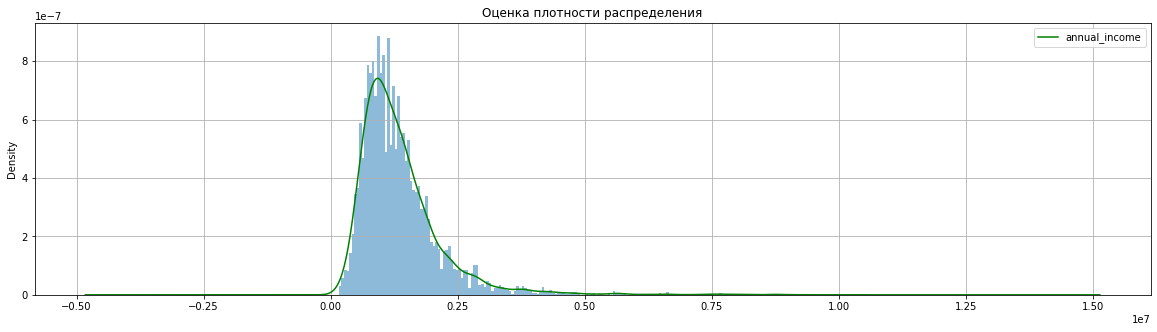

In [58]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['annual_income'])

In [59]:
# Заполним пропуски средним значением 
train_data_reord['annual_income'] = train_data_reord['annual_income'].fillna(train_data_reord['annual_income'].mean())

Колличество пропусков:
0
----------------------------------------------------------------------------------------------------

Колличество значений:
7500
----------------------------------------------------------------------------------------------------

Описательные статистики:
count        7500.00
mean      1366391.72
std        752481.20
min        164597.00
25%        931133.00
50%       1366391.72
75%       1499974.00
max      10149344.00
Name: annual_income, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[ 482087.       1025487.        751412.       ... 1878910.
 1366391.720175 1366391.720175]
----------------------------------------------------------------------------------------------------



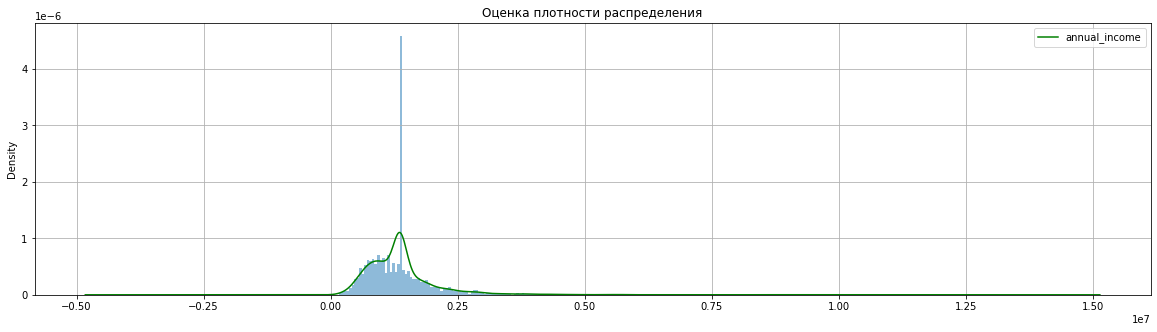

In [60]:
# Проверим результат. 
estimation_missing_num_data(train_data_reord['annual_income'])

**credit_score**

Колличество пропусков:
1557
----------------------------------------------------------------------------------------------------

Колличество значений:
5943
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    5943.00
mean     1151.09
std      1604.45
min       585.00
25%       711.00
50%       731.00
75%       743.00
max      7510.00
Name: credit_score, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[749. 737. 742. ... 748.  nan  nan]
----------------------------------------------------------------------------------------------------



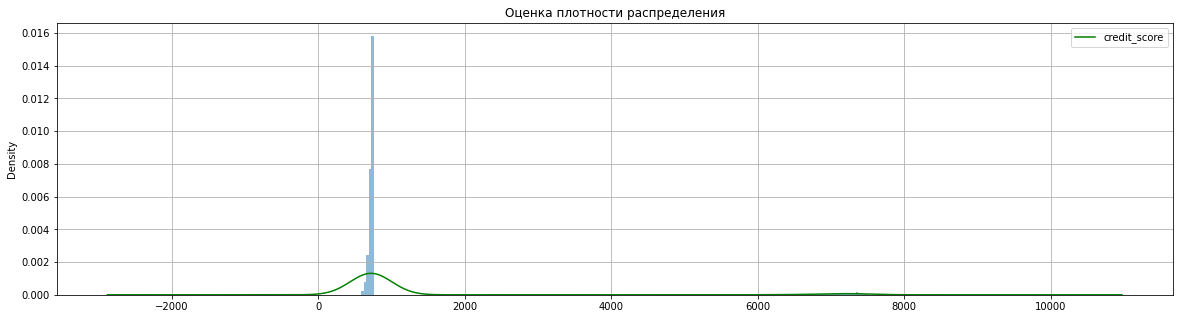

In [61]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['credit_score'])

In [62]:
# Заполним пропуски медианным значением 
train_data_reord['credit_score'] = train_data_reord['credit_score'].fillna(train_data_reord['credit_score'].median())

Колличество пропусков:
0
----------------------------------------------------------------------------------------------------

Колличество значений:
7500
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    7500.00
mean     1063.88
std      1438.34
min       585.00
25%       718.00
50%       731.00
75%       740.00
max      7510.00
Name: credit_score, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[749. 737. 742. ... 748. 731. 731.]
----------------------------------------------------------------------------------------------------



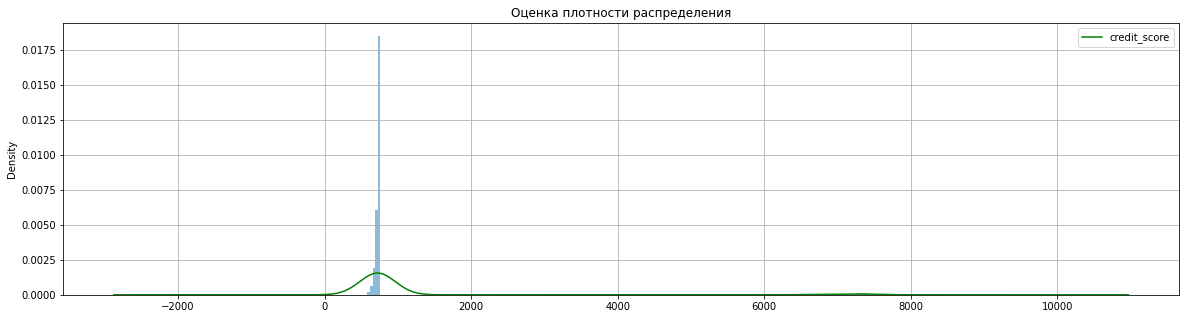

In [63]:
# Проверим результат.
estimation_missing_num_data(train_data_reord['credit_score'])

**months_since_last_delinquent**

Колличество пропусков:
4081
----------------------------------------------------------------------------------------------------

Колличество значений:
3419
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    3419.00
mean       34.69
std        21.69
min         0.00
25%        16.00
50%        32.00
75%        50.00
max       118.00
Name: months_since_last_delinquent, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[nan nan nan ... nan nan nan]
----------------------------------------------------------------------------------------------------



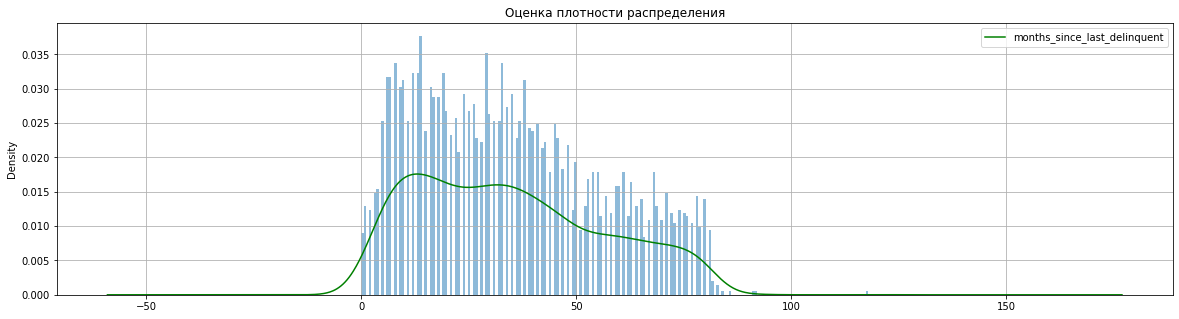

In [64]:
# Оценка пропусков данных
estimation_missing_num_data(train_data_reord['months_since_last_delinquent'])

In [65]:
# Заполним пропуски пропущенных значений 
train_data_reord['months_since_last_delinquent'] = train_data_reord['months_since_last_delinquent'].fillna(train_data_reord['months_since_last_delinquent'].median())

Колличество пропусков:
0
----------------------------------------------------------------------------------------------------

Колличество значений:
7500
----------------------------------------------------------------------------------------------------

Описательные статистики:
count    7500.00
mean       33.23
std        14.70
min         0.00
25%        32.00
50%        32.00
75%        32.00
max       118.00
Name: months_since_last_delinquent, dtype: float64
----------------------------------------------------------------------------------------------------

Значения:
[32. 32. 32. ... 32. 32. 32.]
----------------------------------------------------------------------------------------------------



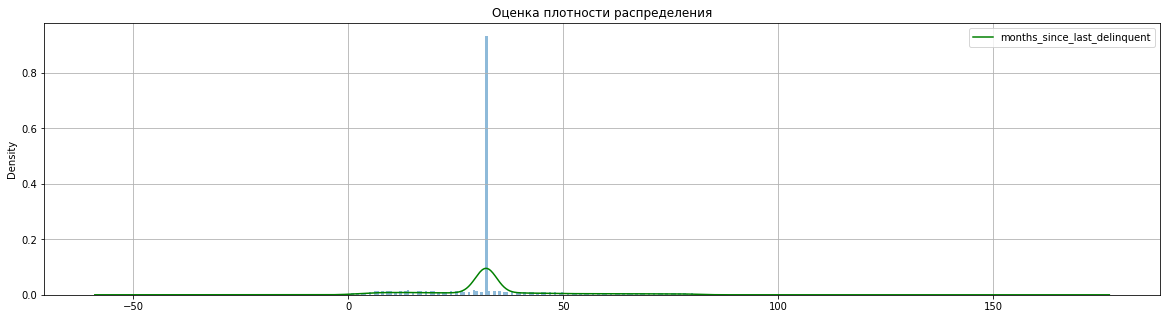

In [66]:
# Проверим результат.
estimation_missing_num_data(train_data_reord['months_since_last_delinquent'])

In [67]:
# Оценим наличие пропущенных значений после заполнения во всем наборе данных. 
train_data_reord.isna().sum()

credit_default                  0
term                            0
home_ownership                  0
purpose                         0
years_in_current_job            0
tax_liens                       0
number_of_open_accounts         0
bankruptcies                    0
number_of_credit_problems       0
annual_income                   0
maximum_open_credit             0
current_loan_amount             0
current_credit_balance          0
monthly_debt                    0
credit_score                    0
years_of_credit_history         0
months_since_last_delinquent    0
dtype: int64

In [68]:
train_data_reord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   credit_default                7500 non-null   category
 1   term                          7500 non-null   int64   
 2   home_ownership                7500 non-null   int64   
 3   purpose                       7500 non-null   int32   
 4   years_in_current_job          7500 non-null   category
 5   tax_liens                     7500 non-null   category
 6   number_of_open_accounts       7500 non-null   float64 
 7   bankruptcies                  7500 non-null   category
 8   number_of_credit_problems     7500 non-null   category
 9   annual_income                 7500 non-null   float64 
 10  maximum_open_credit           7500 non-null   float64 
 11  current_loan_amount           7500 non-null   float64 
 12  current_credit_balance        7500 non-null   fl

После всех предварительных трасфомаций и удаления пропущенных значения приведем категориальные переменные к типу int. 

In [69]:
# Приведем тип category  к типу данных int
train_data_reord[['credit_default', 'years_in_current_job','tax_liens','bankruptcies','number_of_open_accounts', 'number_of_credit_problems']] = train_data_reord[['credit_default', 'years_in_current_job','tax_liens','bankruptcies','number_of_open_accounts', 'number_of_credit_problems']].astype(float)

In [70]:
train_data_reord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   credit_default                7500 non-null   float64
 1   term                          7500 non-null   int64  
 2   home_ownership                7500 non-null   int64  
 3   purpose                       7500 non-null   int32  
 4   years_in_current_job          7500 non-null   float64
 5   tax_liens                     7500 non-null   float64
 6   number_of_open_accounts       7500 non-null   float64
 7   bankruptcies                  7500 non-null   float64
 8   number_of_credit_problems     7500 non-null   float64
 9   annual_income                 7500 non-null   float64
 10  maximum_open_credit           7500 non-null   float64
 11  current_loan_amount           7500 non-null   float64
 12  current_credit_balance        7500 non-null   float64
 13  mon

### _Deduplicating data_

---

Оценим наличие дубллирующих значений. 

In [71]:
print("Колличество дублирующих значений:\n{}".format(train_data_reord.duplicated().sum()))

Колличество дублирующих значений:
0


<center>

# Section 3.Conclusions

Этап переформатирования данных состоял из двух основных разделов, каждый из которых имеет серию подразделов. Сведем полученные результаты и выводы в единое заключение. 

1. **Section 1. Data Understanding** 
    1. **Collect initial data**
        1. Набор имеет 17 переменных и 7500 наблюдений.
        1. В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500.
        1. Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
        1. Переменная Credit Default имеет тип данных int64.
        1. Оставшиеся 12 переменных имеют тип данныз float64
    1. **Describe data**
        - *Описание датасета*
        1. Home Ownership - домовладение
        1. Annual Income - годовой доход
        1. Years in current job - количество лет на текущем месте работы
        1. Tax Liens - налоговые обременения
        1. Number of Open Accounts - количество открытых счетов
        1. Years of Credit History - количество лет кредитной истории
        1. Maximum Open Credit - наибольший открытый кредит
        1. Number of Credit Problems - количество проблем с кредитом
        1. Months since last delinquent - количество месяцев с последней просрочки платежа
        1. Bankruptcies - банкротства
        1. Purpose - цель кредита
        1. Term - срок кредита
        1. Current Loan Amount - текущая сумма кредита
        1. Current Credit Balance - текущий кредитный баланс
        1. Monthly Debt - ежемесячный долг
        1. Credit Score - кредитная оценка
        1. Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)
        - *Тип переменных* 
        - Категориальные переменные
            - Home Ownership
            - Years in current job
            - Tax Liens
            - Purpose
            - Term
            - Credit Default
        - Количественные переменные
            - Annual Income
            - Number of Open Accounts
            - Years of Credit History
            - Maximum Open Credit
            - Months since last delinquent
            - Current Loan Amount
            - Current Credit Balance
            - Monthly Debt
            - Credit Score
        - Требуются дополнительные исследования
            - Number of Credit Problems
            - Bankruptcies
    1. **Verify data quality**
        - 6 катеориальных переменных
        - 9 колличественных переменных 
        - 2 переменные которые можно оценить как категориальные так и числовые, необходим дальнейший анализ
        - Набор имеет 17 переменных и 7500 наблюдений.
        - В столбцах Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score колличество наблюдений меньше, чем 7500. 
        - Переменные Home Ownership, Years in current job, Purpose, Term имеют тип данных object.
        - Переменная Credit Default имеет тип данных int64.
        - Оставшиеся 12 переменных имеют тип данныз float64.
        - 7580 пропущенных значений 
        - 119920 отличных от NaN
        - Дублирующих строк нет 
        - Индекс типа RangeIndex, непрерывный с шагом 1     

1. **Section 2. Data Preparation**
    1. **Renaming**
        - Имена переменых переименнованны к стандартному виду: с маленькой буквы и без пробелов 
    1. **Data type conversions**
        - Уточнены типы переменных ankruptcies и number_of_credit_problems. Они являются категориальными     
        - Категориальные переменные конвертированы в тип данных category 
        - Тип данных колличественных переменных оставлен без изменения float64
    1. **Sorting, reordering, reindexing**
        - Набор данных переупорядочен следующим образом: 
            1. home_ownership
            1. purpose
            1. term
            1. years_in_current_job 
            1. tax_liens
            1. number_of_credit_problems
            1. bankruptcies
            1. credit_default 
            1. annual_income
            1. maximum_open_credit
            1. current_loan_amount
            1. current_credit_balance
            1. monthly_debt
            1. credit_score
            1. number_of_open_accounts
            1. years_of_credit_history
            1. months_since_last_delinquent
    1. **Addressing missing or invalid data**
        - Установленно, что следующие переменные имеют пропущенные значения 
            - years_in_current_job  
            - bankruptcies
            - annual_income
            - credit_score
            - months_since_last_delinquent
        - В каждом отдельном случае пропущенные значения заполнены соответсвующим методом на основании детального исследования переменной 
    1. **Deduplicating data**
        - Дублирующих значений нет. 

<center>
    
# **STAGE 3. EXPLORATORY DATA ANALYSIS**

<center>

# Section 1. Research

### _Descriptive Statistics_

---

In [72]:
# Переименуюем название набора данных для анализа
train_data_eda = train_data_reord

Раздели исходный подготовленный набора данных train_data_eda на два поднабора по типам признаков для детального анализа: 
- Категориальный набор признаков: train_data_eda_cat
- Колличественный набор признаков: train_data_eda_num

In [73]:
# Выделим категориальные признаки в отдельный набор данных
train_data_eda_cat = train_data_eda[['home_ownership',
                                     'years_in_current_job',
                                     'tax_liens',
                                     'number_of_credit_problems',
                                     'bankruptcies',
                                     'purpose',
                                     'term',
                                     'credit_default']]

In [74]:
# Выделим колличественные признаки в отдельный набор данных
train_data_eda_num = train_data_eda[['annual_income',
                                     'number_of_open_accounts',
                                     'years_of_credit_history',
                                     'maximum_open_credit',
                                     'months_since_last_delinquent',
                                     'current_loan_amount',
                                     'current_credit_balance',
                                     'monthly_debt',
                                     'credit_score']]

Описательные статистики для колличественных переменных

In [75]:
# Изменение формата отаброжения чисел.
pd.options.display.float_format = '{:.2f}'.format

In [76]:
# Сводные описательные статистики
train_data_eda_num.describe()

annual_income  number_of_open_accounts  years_of_credit_history  \
count        7500.00                  7500.00                  7500.00   
mean      1366391.72                    11.13                    18.32   
std        752481.20                     4.91                     7.04   
min        164597.00                     2.00                     4.00   
25%        931133.00                     8.00                    13.50   
50%       1366391.72                    10.00                    17.00   
75%       1499974.00                    14.00                    21.80   
max      10149344.00                    43.00                    57.70   

       maximum_open_credit  months_since_last_delinquent  current_loan_amount  \
count              7500.00                       7500.00              7500.00   
mean             945153.73                         33.23          11873177.45   
std            16026216.67                         14.70          31926122.97   
min                   0.00                          0.00             11242.00   
25%              279229.50                         32.00            180169.00   
50%              478159.00                         32.00            309573.00   
75%              793501.50                         32.00            519882.00   
max          1304726170.00                        118.00          99999999.00   

       current_credit_balance  monthly_debt  credit_score  
count                 7500.00       7500.00       7500.00  
mean                289833.24      18314.45       1063.88  
std                 317871.38      11926.76       1438.34  
min                      0.00          0.00        585.00  
25%                 114256.50      10067.50        718.00  
50%                 209323.00      16076.50        731.00  
75%                 360406.25      23818.00        740.00  
max                6506797.00     136679.00       7510.00

In [77]:
# Смещение 
train_data_eda_num.skew()

annual_income                   3.40
number_of_open_accounts         1.12
years_of_credit_history         1.05
maximum_open_credit            74.19
months_since_last_delinquent    0.93
current_loan_amount             2.40
current_credit_balance          5.20
monthly_debt                    1.68
credit_score                    3.99
dtype: float64

In [78]:
# Эксцесс
train_data_eda_num.kurt()

annual_income                    21.91
number_of_open_accounts           2.24
years_of_credit_history           1.60
maximum_open_credit            5894.46
months_since_last_delinquent      2.08
current_loan_amount               3.75
current_credit_balance           52.95
monthly_debt                      5.83
credit_score                     13.97
dtype: float64

Описательные статистики для категориальных переменных

In [79]:
# Сводные описательные статистики
train_data_eda_cat.describe()

home_ownership  years_in_current_job  tax_liens  \
count         7500.00               7500.00    7500.00   
mean             0.94                  6.08       0.03   
std              0.95                  3.64       0.27   
min              0.00                  0.00       0.00   
25%              0.00                  3.00       0.00   
50%              1.00                  6.00       0.00   
75%              2.00                 10.00       0.00   
max              2.00                 10.00       7.00   

       number_of_credit_problems  bankruptcies  purpose    term  \
count                    7500.00       7500.00  7500.00 7500.00   
mean                        0.17          0.12     3.73    0.26   
std                         0.50          0.35     2.08    0.44   
min                         0.00          0.00     0.00    0.00   
25%                         0.00          0.00     3.00    0.00   
50%                         0.00          0.00     3.00    0.00   
75%                         0.00          0.00     3.00    1.00   
max                         7.00          4.00    14.00    1.00   

       credit_default  
count         7500.00  
mean             0.28  
std              0.45  
min              0.00  
25%              0.00  
50%              0.00  
75%              1.00  
max              1.00

In [80]:
# Смещение 
train_data_eda_cat.skew()

home_ownership               0.12
years_in_current_job        -0.26
tax_liens                   12.99
number_of_credit_problems    4.56
bankruptcies                 3.27
purpose                      2.16
term                         1.10
credit_default               0.97
dtype: float64

In [81]:
# Эксцесс
train_data_eda_cat.kurt()

home_ownership               -1.89
years_in_current_job         -1.46
tax_liens                   215.60
number_of_credit_problems    32.10
bankruptcies                 13.65
purpose                       4.42
term                         -0.79
credit_default               -1.06
dtype: float64

### _Distribution of data_

---

#### Исследуем распределение колличественных переменных

In [82]:
# Список переменных
train_data_eda_num.columns.to_list()

['annual_income',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'months_since_last_delinquent',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score']

In [83]:
def distribution_of_quantitative_variables(data_for_eda):
    
    fig, ax = plt.subplots(ncols=3, figsize=(25, 5))
    fig.subplots_adjust(wspace=0.15)
    plt.suptitle("Распределение переменной", fontsize=18)
    
    sns.histplot(data = data_for_eda, bins = 80, stat = 'density', kde = True, ax=ax[0])
    sns.boxenplot(data = data_for_eda, ax=ax[1])
    sns.scatterplot(data = data_for_eda, ax=ax[2])
    
    print("Описательные статистики:\n{}".format(data_for_eda.describe().round(2)))

##### annual_income

In [84]:
annual_income = train_data_eda_num['annual_income']

Описательные статистики:
count       7500.00
mean     1366391.72
std       752481.20
min       164597.00
25%       931133.00
50%      1366391.72
75%      1499974.00
max     10149344.00
Name: annual_income, dtype: float64


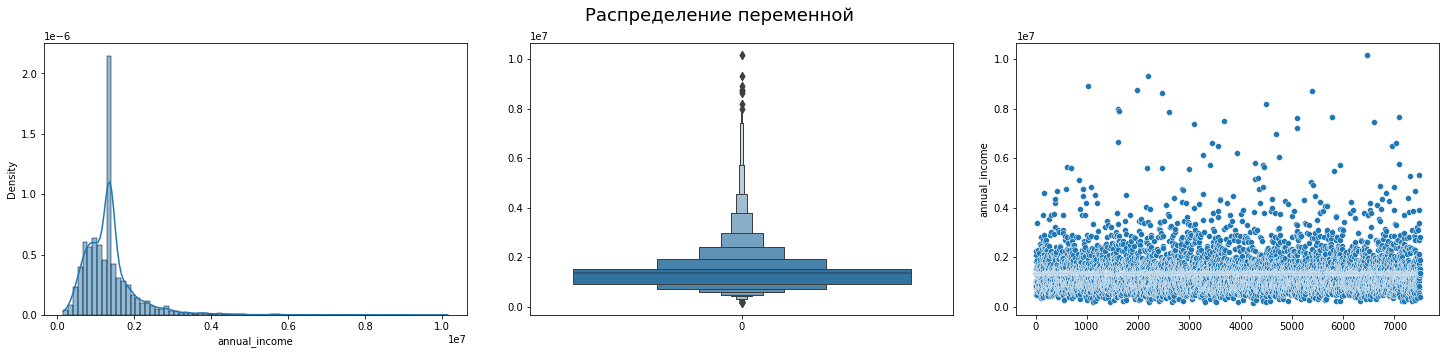

In [85]:
# Оценка распределения данных
distribution_of_quantitative_variables(annual_income)

Из графиков явно видно начличе выборосов значений переменной. Так же набдлюдается сущетсвнны разрыв между 75-м процетилем и максимальным значением. Медиана и средние не  сильно отличаются друг от друга, что гворит что в целом данные расределены равномерно относительно среденего. 

##### number_of_open_accounts

In [86]:
number_of_open_accounts = train_data_eda_num['number_of_open_accounts']

Описательные статистики:
count   7500.00
mean      11.13
std        4.91
min        2.00
25%        8.00
50%       10.00
75%       14.00
max       43.00
Name: number_of_open_accounts, dtype: float64


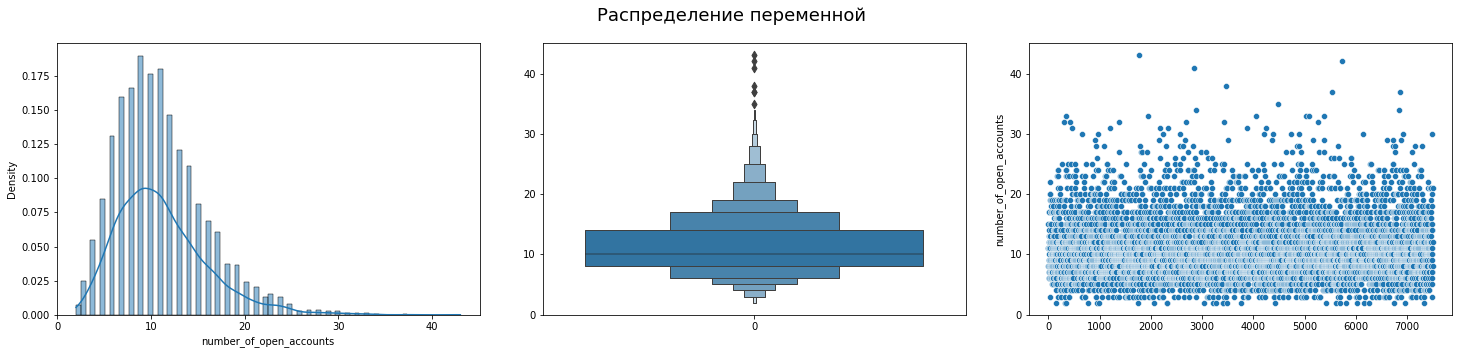

In [87]:
# Оценка распределения данных
distribution_of_quantitative_variables(number_of_open_accounts)

Есть небольшые выбросы и смещение данных относительно среднего в правыю сторону. 

##### years_of_credit_history

In [88]:
# Оценка распределения данных
years_of_credit_history = train_data_eda_num['years_of_credit_history']

Описательные статистики:
count   7500.00
mean      18.32
std        7.04
min        4.00
25%       13.50
50%       17.00
75%       21.80
max       57.70
Name: years_of_credit_history, dtype: float64


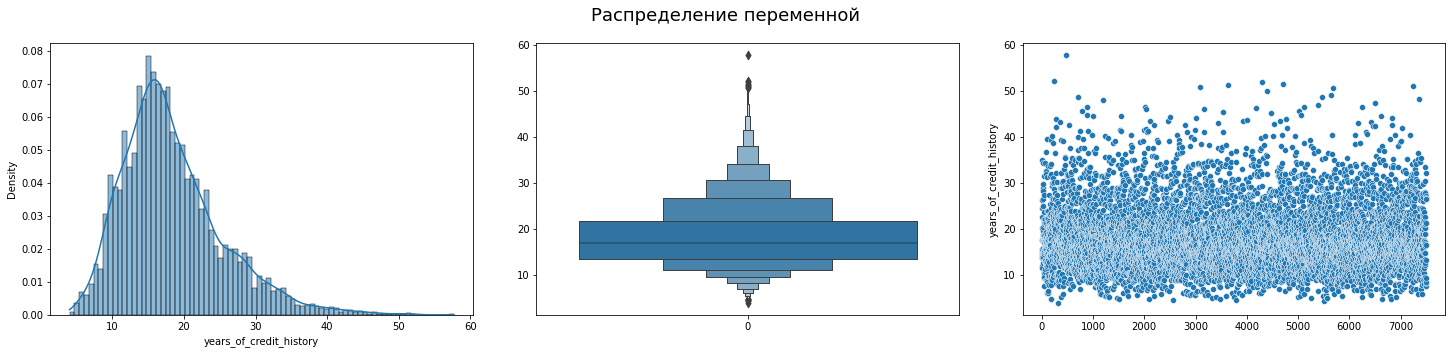

In [89]:
distribution_of_quantitative_variables(years_of_credit_history)

Есть небольшое смещение в правую сторону относительно среднего значения и выбросы. 

##### maximum_open_credit

In [90]:
# Оценка распределения данных
maximum_open_credit = train_data_eda_num['maximum_open_credit']

Описательные статистики:
count         7500.00
mean        945153.73
std       16026216.67
min              0.00
25%         279229.50
50%         478159.00
75%         793501.50
max     1304726170.00
Name: maximum_open_credit, dtype: float64


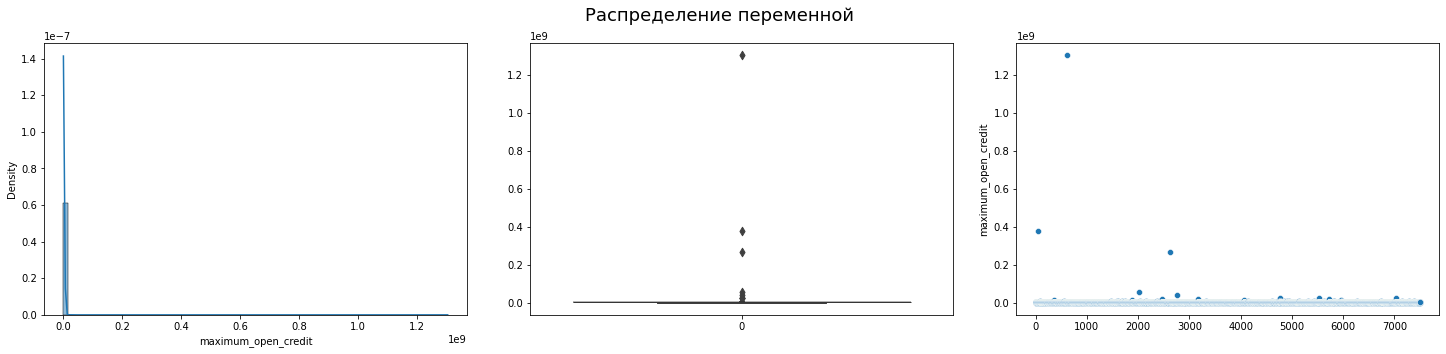

In [91]:
distribution_of_quantitative_variables(maximum_open_credit)

Наблюдается значительный выброс равный  1304726170. 

##### months_since_last_delinquent

In [92]:
months_since_last_delinquent = train_data_eda_num['months_since_last_delinquent']

Описательные статистики:
count   7500.00
mean      33.23
std       14.70
min        0.00
25%       32.00
50%       32.00
75%       32.00
max      118.00
Name: months_since_last_delinquent, dtype: float64


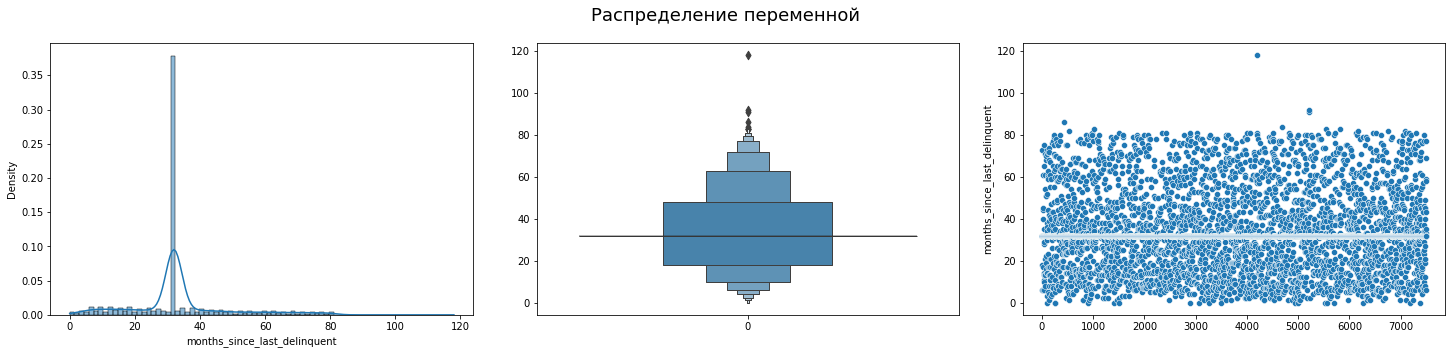

In [93]:
# Оценка распределения данных
distribution_of_quantitative_variables(months_since_last_delinquent)

Наблюдаются выбросы значений. 

##### current_loan_amount

In [94]:
current_loan_amount = train_data_eda_num['current_loan_amount']

Описательные статистики:
count       7500.00
mean    11873177.45
std     31926122.97
min        11242.00
25%       180169.00
50%       309573.00
75%       519882.00
max     99999999.00
Name: current_loan_amount, dtype: float64


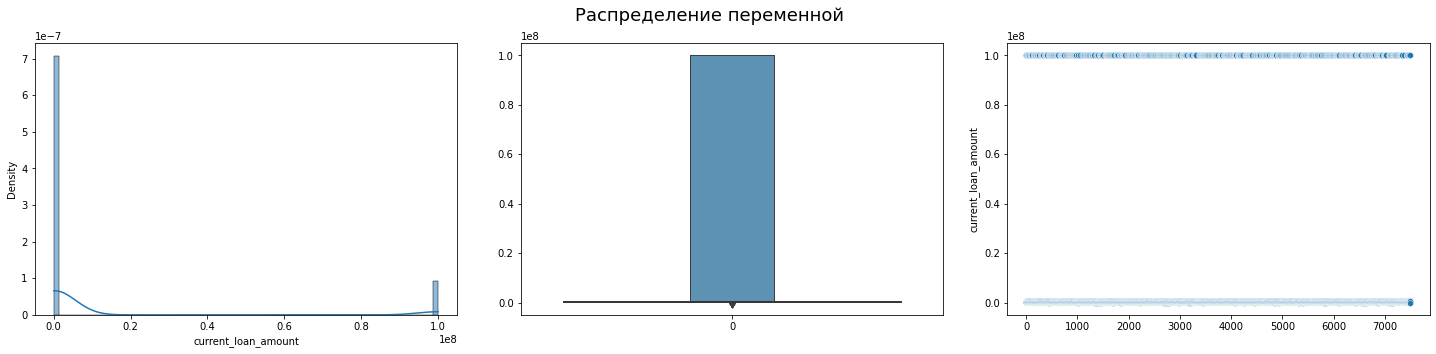

In [95]:
# Оценка распределения данных
distribution_of_quantitative_variables(current_loan_amount)

Есть значительный выброс значения равный 99999999.00  похожий на ошибку в данных. 

##### current_credit_balance

In [96]:
current_credit_balance = train_data_eda_num['current_credit_balance']

Описательные статистики:
count      7500.00
mean     289833.24
std      317871.38
min           0.00
25%      114256.50
50%      209323.00
75%      360406.25
max     6506797.00
Name: current_credit_balance, dtype: float64


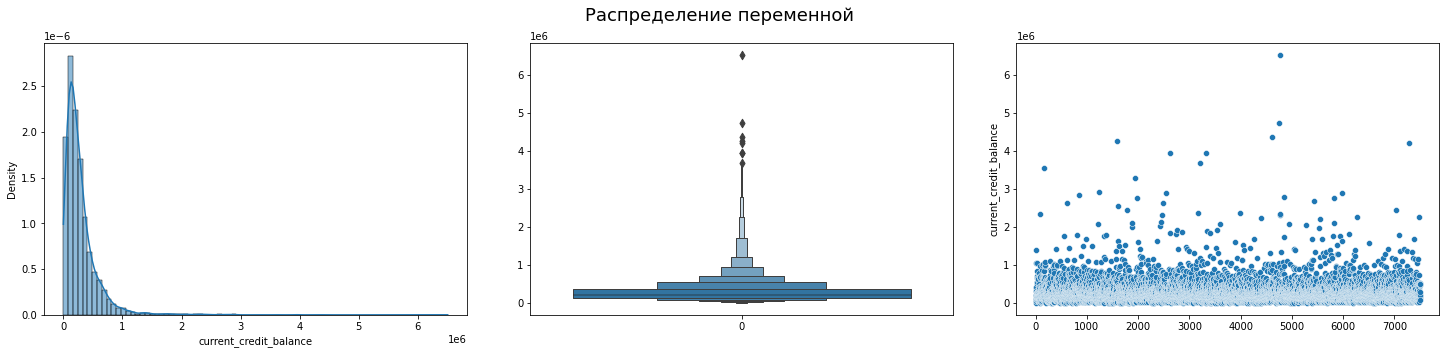

In [97]:
# Оценка распределения данных
distribution_of_quantitative_variables(current_credit_balance)

Имеются выбросы значений и смещение данных относительно среднего в правую сторону. 

##### monthly_debt

In [98]:
monthly_debt = train_data_eda_num['monthly_debt']

Описательные статистики:
count     7500.00
mean     18314.45
std      11926.76
min          0.00
25%      10067.50
50%      16076.50
75%      23818.00
max     136679.00
Name: monthly_debt, dtype: float64


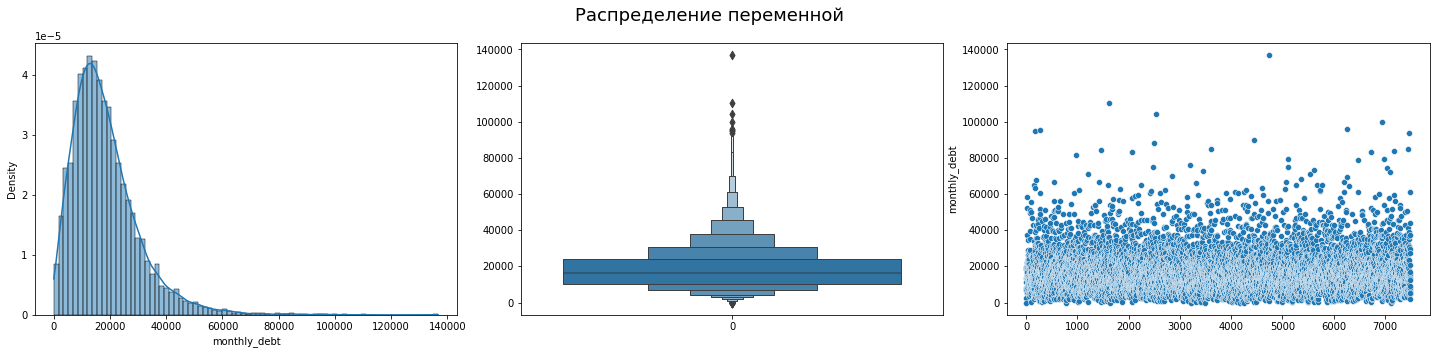

In [99]:
# Оценка распределения данных
distribution_of_quantitative_variables(monthly_debt)

Есть один значимый выброс.

##### credit_score

In [100]:
credit_score = train_data_eda_num['credit_score']

Описательные статистики:
count   7500.00
mean    1063.88
std     1438.34
min      585.00
25%      718.00
50%      731.00
75%      740.00
max     7510.00
Name: credit_score, dtype: float64


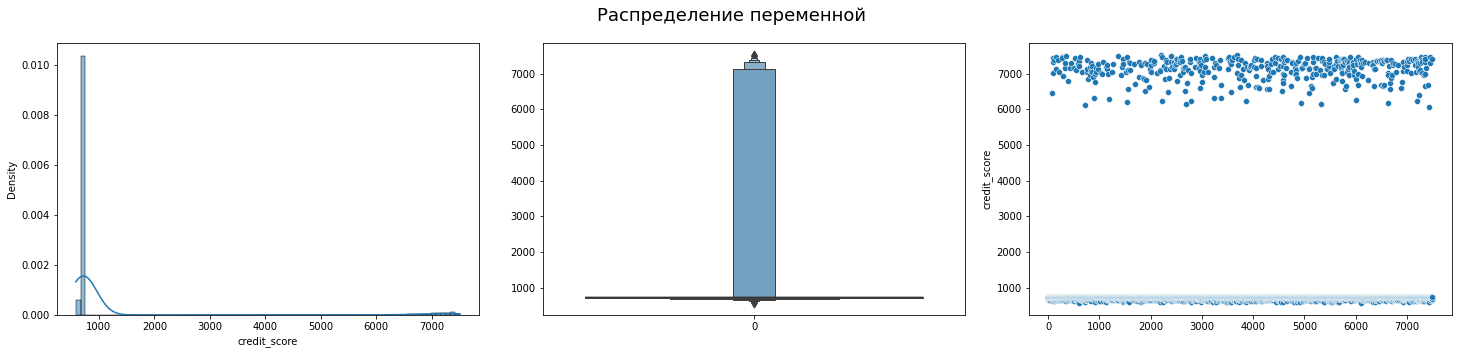

In [101]:
# Оценка распределения данных
distribution_of_quantitative_variables(credit_score)

Данные имеют интересных характер расперделения. Основаная часть данных лежит ниже значения 740, при этом есть значимое колличество значнией с оценкой 6000 и более.

#### Исследуем распределение категориальных переменных

In [102]:
def distribution_of_cat_variables(data_for_eda):
    
    fig, ax = plt.subplots(nrows=2, figsize=(20, 15))
    sns.set_style('whitegrid')
    
    # Categorical scatterplots
    sns.stripplot(data = data_for_eda, alpha=0.7, ax=ax[0])

    # Categorical distribution plots
    sns.boxplot(data = data_for_eda, ax=ax[0])

    # Categorical estimate plots
    sns.barplot(data = data_for_eda,  ax=ax[1]) 

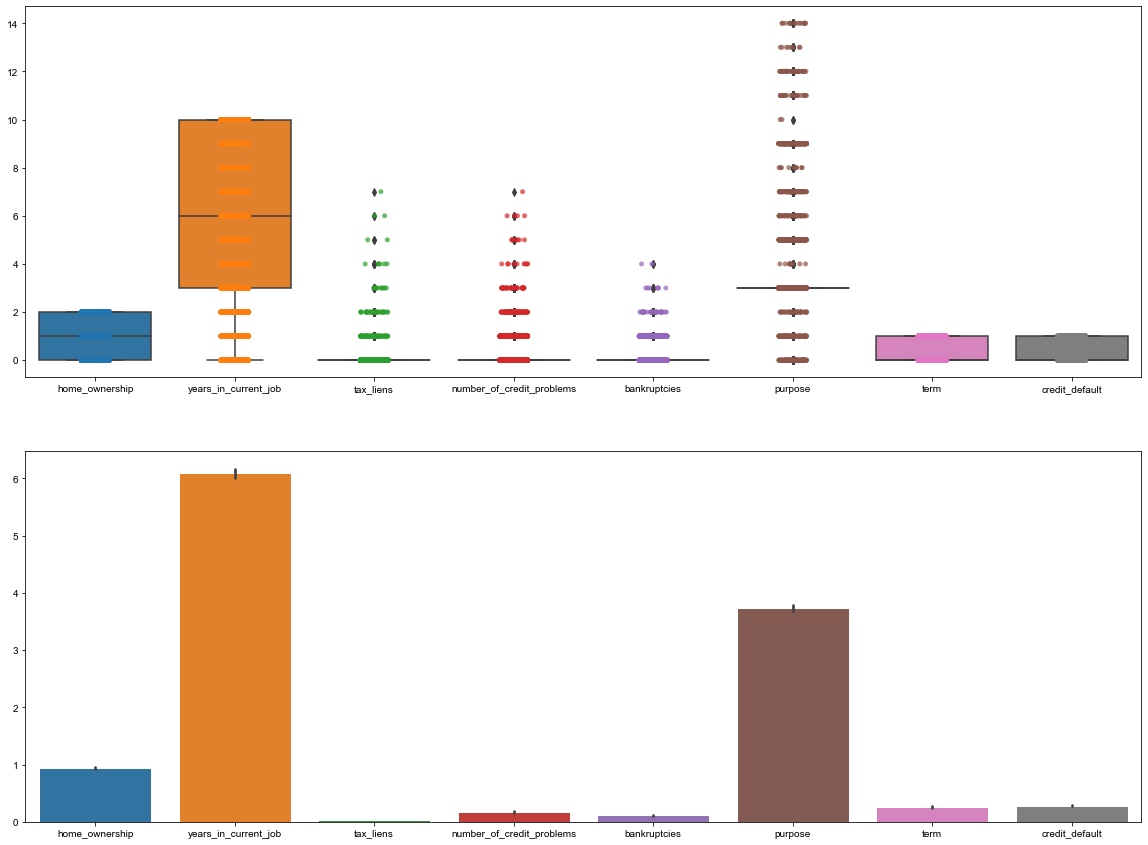

In [103]:
# Оценка распределения категорияльных переменных.
distribution_of_cat_variables(train_data_eda_cat)

Анализ распределения категориальных переменных показывает, что переменные tax_liens, number_of_credit_problems, bunkruptcies имеют незначительные выбросы. С 4 до 8 для tax_liens, с 6 до 8 для number_of_credit_problems и 4 для bunkruptcies.  Значения для остальных переменных распеределены относительно равномерно в предалах диапазона изменения переменной. 

### _Filtering outliers_

---

На основании анализа распеределения переменных выполнненого в предыдущем разделе установленно, что все колличественые переменные имеют выросы, которые необходимо отфильтровать для проведения дальнейших исследований. 

In [104]:
# Создадим для набора без выбросов отдельную перменную
train_data_eda_outliers = train_data_eda

##### annual_income

Описательные статистики:
count      7500.00
mean    1321758.10
std      585807.21
min      164597.00
25%      931133.00
50%     1366391.72
75%     1471079.75
max     4225847.00
Name: annual_income, dtype: float64


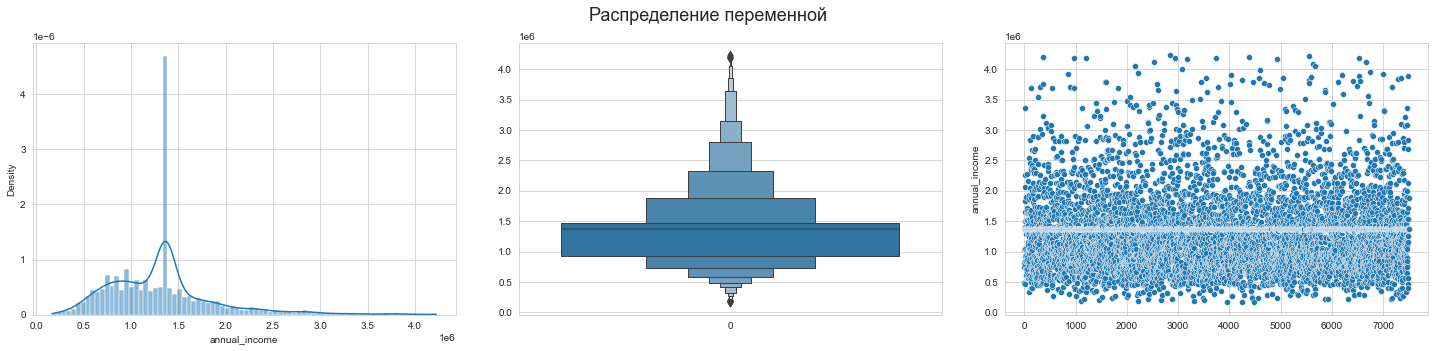

In [105]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['annual_income'] > 
                                            train_data_eda_outliers['annual_income'].quantile(.99), 'annual_income'] = train_data_eda_outliers['annual_income'].median()
# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['annual_income'])

##### number_of_open_accounts

Описательные статистики:
count   7500.00
mean      10.96
std        4.55
min        2.00
25%        8.00
50%       10.00
75%       14.00
max       27.00
Name: number_of_open_accounts, dtype: float64


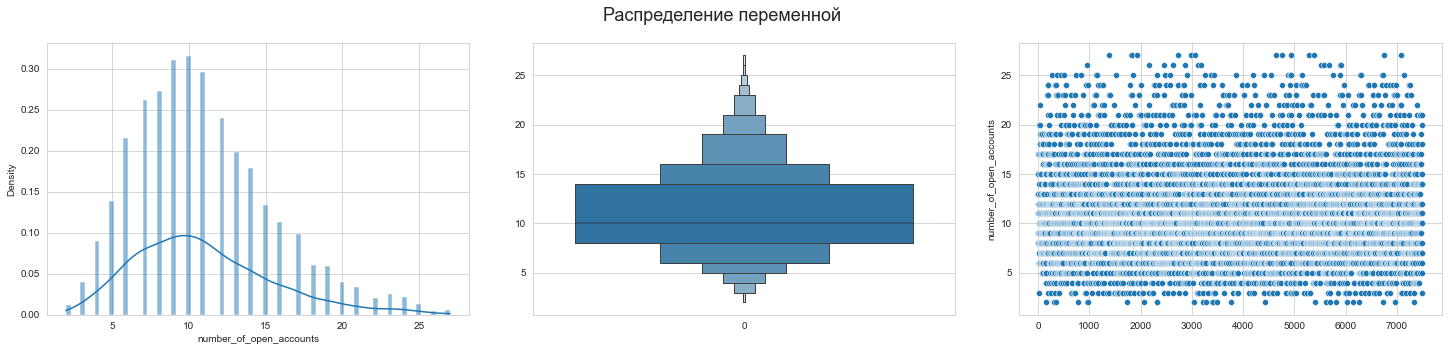

In [106]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['number_of_open_accounts'] > 
train_data_eda_outliers['number_of_open_accounts'].quantile(.99), 'number_of_open_accounts'] = train_data_eda_outliers['number_of_open_accounts'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['number_of_open_accounts'])

##### years_of_credit_history

Описательные статистики:
count   7500.00
mean      17.83
std        6.19
min        4.00
25%       13.50
50%       17.00
75%       21.40
max       36.50
Name: years_of_credit_history, dtype: float64


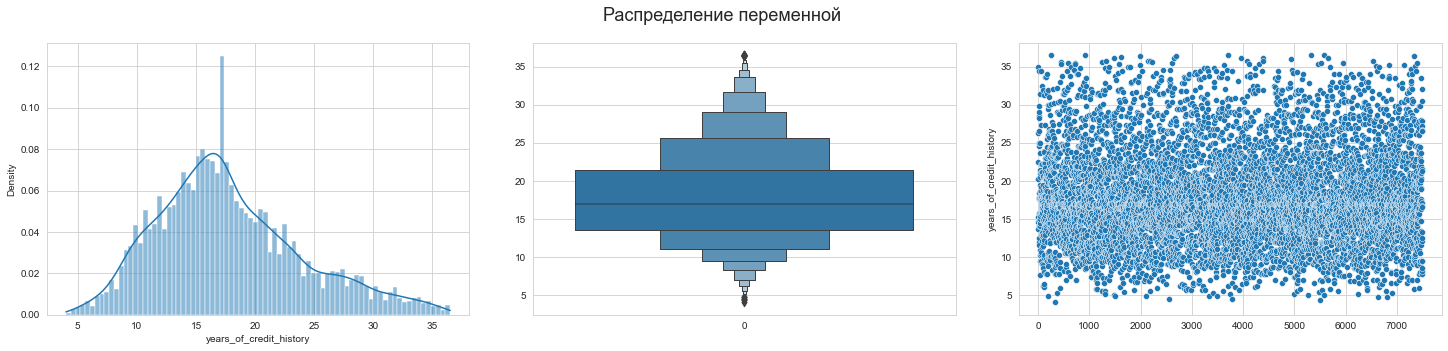

In [107]:
# Заменим все значения больште 98 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['years_of_credit_history'] > 
train_data_eda_outliers['years_of_credit_history'].quantile(.98), 'years_of_credit_history'] = train_data_eda_outliers['years_of_credit_history'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['years_of_credit_history'])

##### maximum_open_credit

Описательные статистики:
count      7500.00
mean     603753.11
std      483459.07
min           0.00
25%      279229.50
50%      478153.50
75%      779339.00
max     3567982.00
Name: maximum_open_credit, dtype: float64


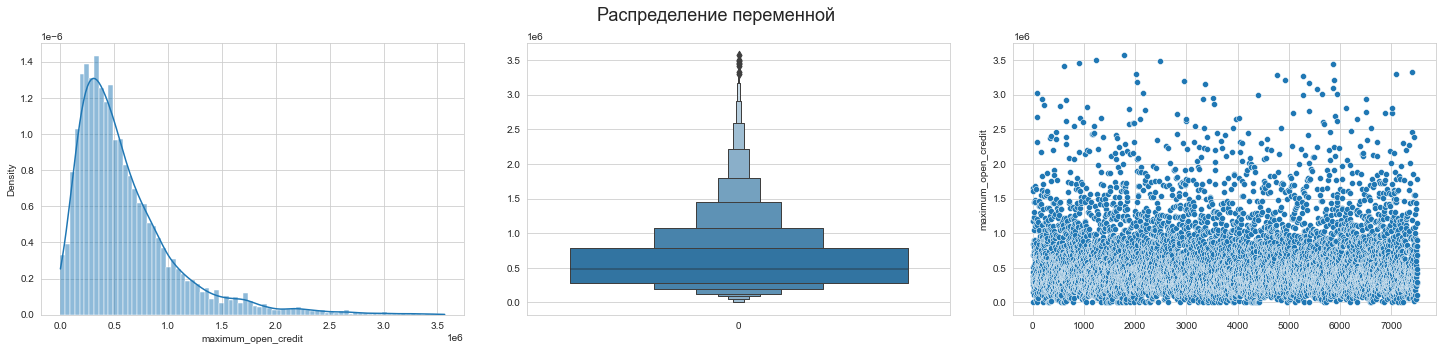

In [108]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['maximum_open_credit'] > 
train_data_eda_outliers['maximum_open_credit'].quantile(.99), 'maximum_open_credit'] = train_data_eda_outliers['maximum_open_credit'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['maximum_open_credit'])

##### months_since_last_delinquent

Описательные статистики:
count   7500.00
mean      32.84
std       14.05
min        0.00
25%       32.00
50%       32.00
75%       32.00
max       79.00
Name: months_since_last_delinquent, dtype: float64


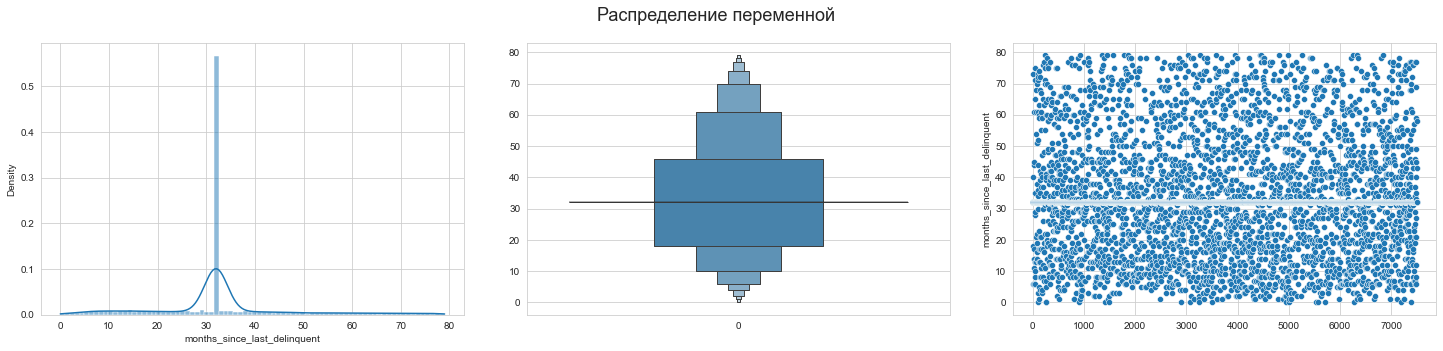

In [109]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['months_since_last_delinquent'] > 
train_data_eda_outliers['months_since_last_delinquent'].quantile(.99), 'months_since_last_delinquent'] = train_data_eda_outliers['months_since_last_delinquent'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['months_since_last_delinquent'])

##### current_loan_amount

Описательные статистики:
count     7500.00
mean    309088.03
std     171393.74
min      11242.00
25%     180169.00
50%     309567.50
75%     396929.50
max     789030.00
Name: current_loan_amount, dtype: float64


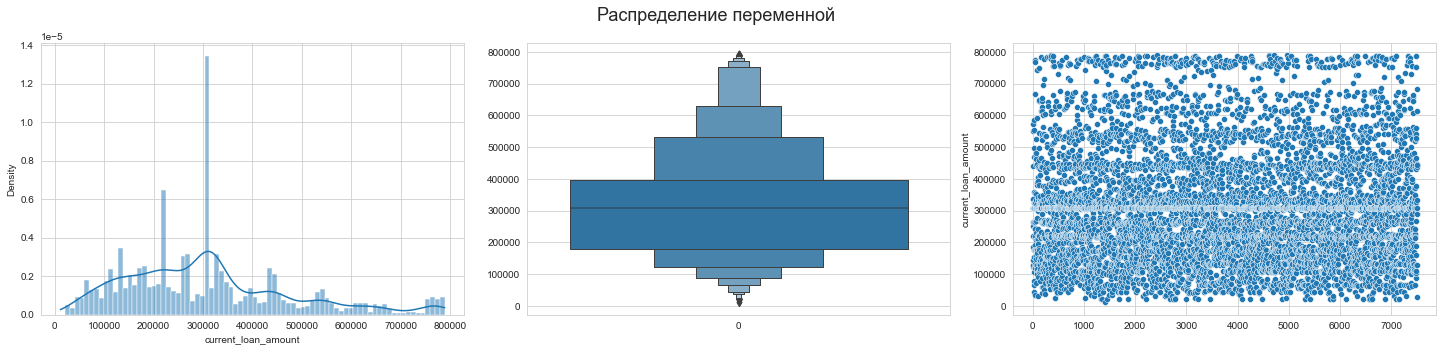

In [110]:
# Заменим все значения равное 99999999.00 на среднее

train_data_eda_outliers.loc[train_data_eda_outliers['current_loan_amount'] == 
99999999.00, 'current_loan_amount'] = train_data_eda_outliers['current_loan_amount'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['current_loan_amount'])

##### current_credit_balance

Описательные статистики:
count      7500.00
mean     268542.86
std      225117.20
min           0.00
25%      114256.50
50%      209313.50
75%      350887.25
max     1483026.00
Name: current_credit_balance, dtype: float64


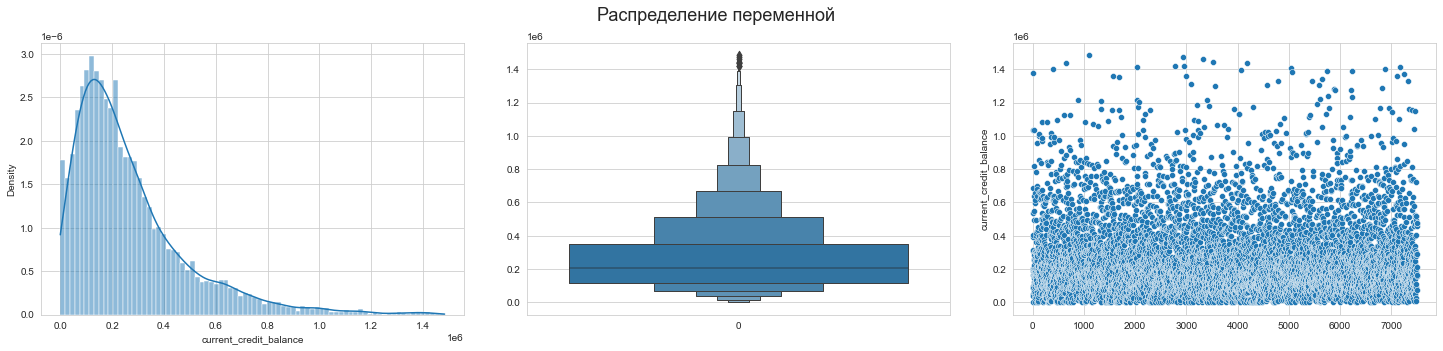

In [111]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['current_credit_balance'] > 
train_data_eda_outliers['current_credit_balance'].quantile(.99), 'current_credit_balance'] = train_data_eda_outliers['current_credit_balance'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['current_credit_balance'])

##### monthly_debt

Описательные статистики:
count    7500.00
mean    17757.48
std     10550.74
min         0.00
25%     10067.50
50%     16075.75
75%     23433.75
max     58113.00
Name: monthly_debt, dtype: float64


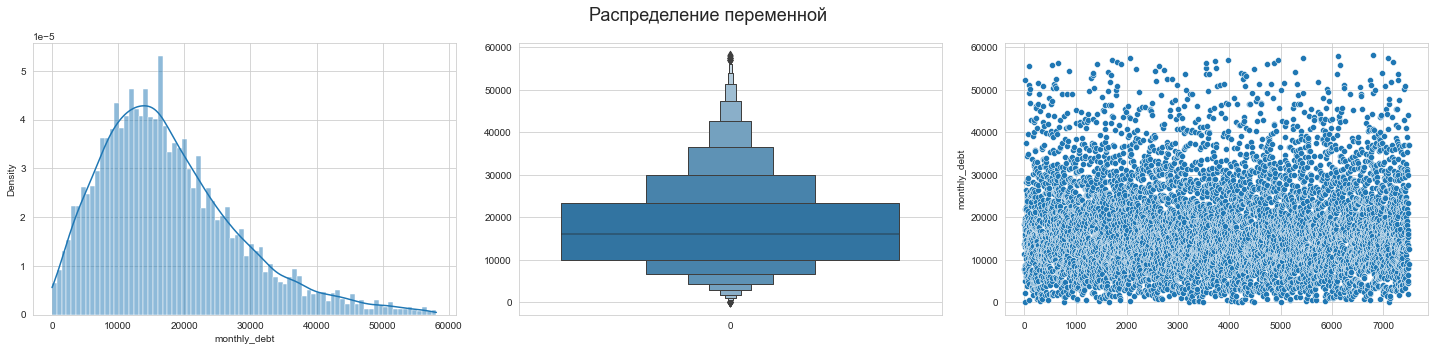

In [112]:
# Заменим все значения больште 99 процентиля средним 
train_data_eda_outliers.loc[train_data_eda_outliers['monthly_debt'] > 
train_data_eda_outliers['monthly_debt'].quantile(.99), 'monthly_debt'] = train_data_eda_outliers['monthly_debt'].median()

# Проверка полученного результата
distribution_of_quantitative_variables(train_data_eda_outliers['monthly_debt'])

##### credit_score

Как отмечалось выше переменная credit_score разделение на два дипазона. 

In [113]:
# Колличество занчений больших 5000
sum(train_data_eda_outliers['credit_score'] > 5000)

400

In [114]:
# Колличество занчений меньших 5000
sum(train_data_eda_outliers['credit_score'] < 5000)

7100

In [115]:
# Колличество занчений лежащих в интервале от 3000 до 5000
sum((train_data_eda_outliers['credit_score'] >= 3000) & (train_data_eda_outliers['credit_score'] <= 5000))

0

Оставим перпенну credit_score без изменений.

### _Exploring Relationships_

---

Целевой переменной является credit_default. Исследуем взаимоотношения остальных с целевой. 

In [116]:
# Выделим категориальные признаки в отдельный набор данных
train_data_eda_outliers_cat = train_data_eda_outliers[['home_ownership',
                                     'years_in_current_job',
                                     'tax_liens',
                                     'number_of_credit_problems',
                                     'bankruptcies',
                                     'purpose',
                                     'term',
                                     'credit_default']]

# Выделим колличественные признаки и пермеменную credit_default  в отдельный набор данных
train_data_eda_outliers_num_credit_default = train_data_eda_outliers[['annual_income',
                                     'number_of_open_accounts',
                                     'years_of_credit_history',
                                     'maximum_open_credit',
                                     'months_since_last_delinquent',
                                     'current_loan_amount',
                                     'current_credit_balance',
                                     'monthly_debt',
                                     'credit_score',
                                     'credit_default']]

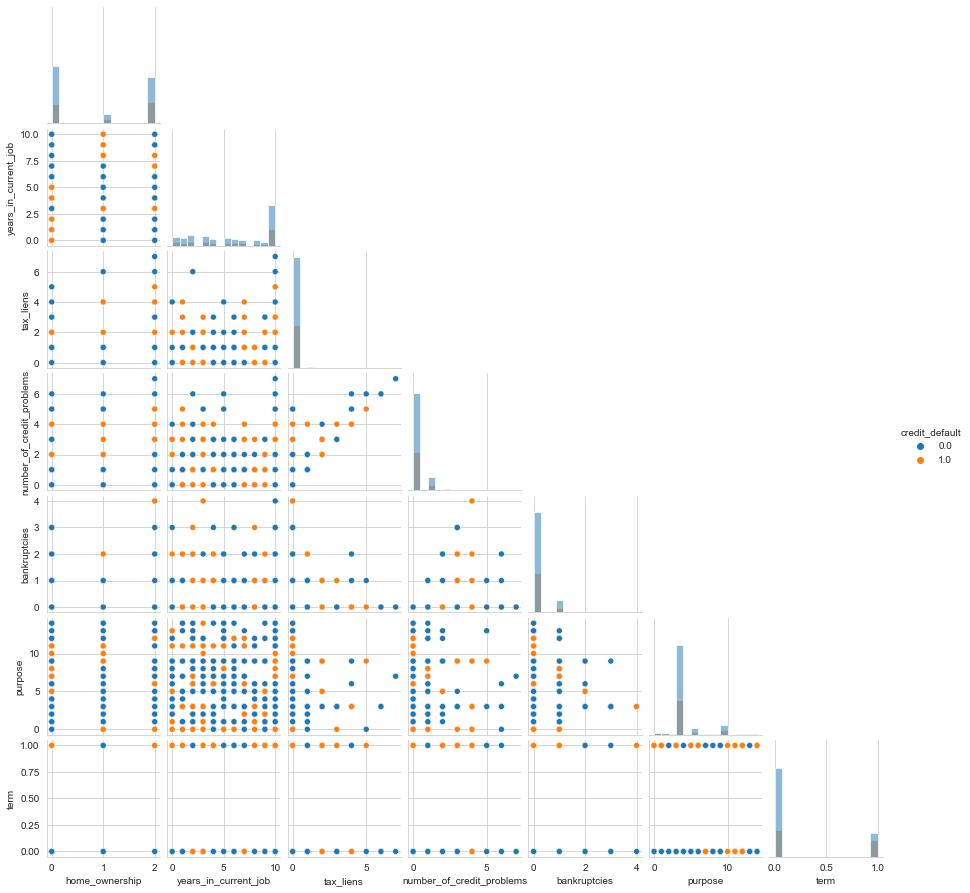

In [117]:
# Постороим график взаимотношения целевой переменной credit_default с остальными категориальными переменными 
sns.pairplot(data=train_data_eda_outliers_cat, hue="credit_default", height=1.8, corner=True, diag_kind="hist")

Анализ графика показывает, что явных взаимоотношений целевой перменной  с другими не наблюдается. 

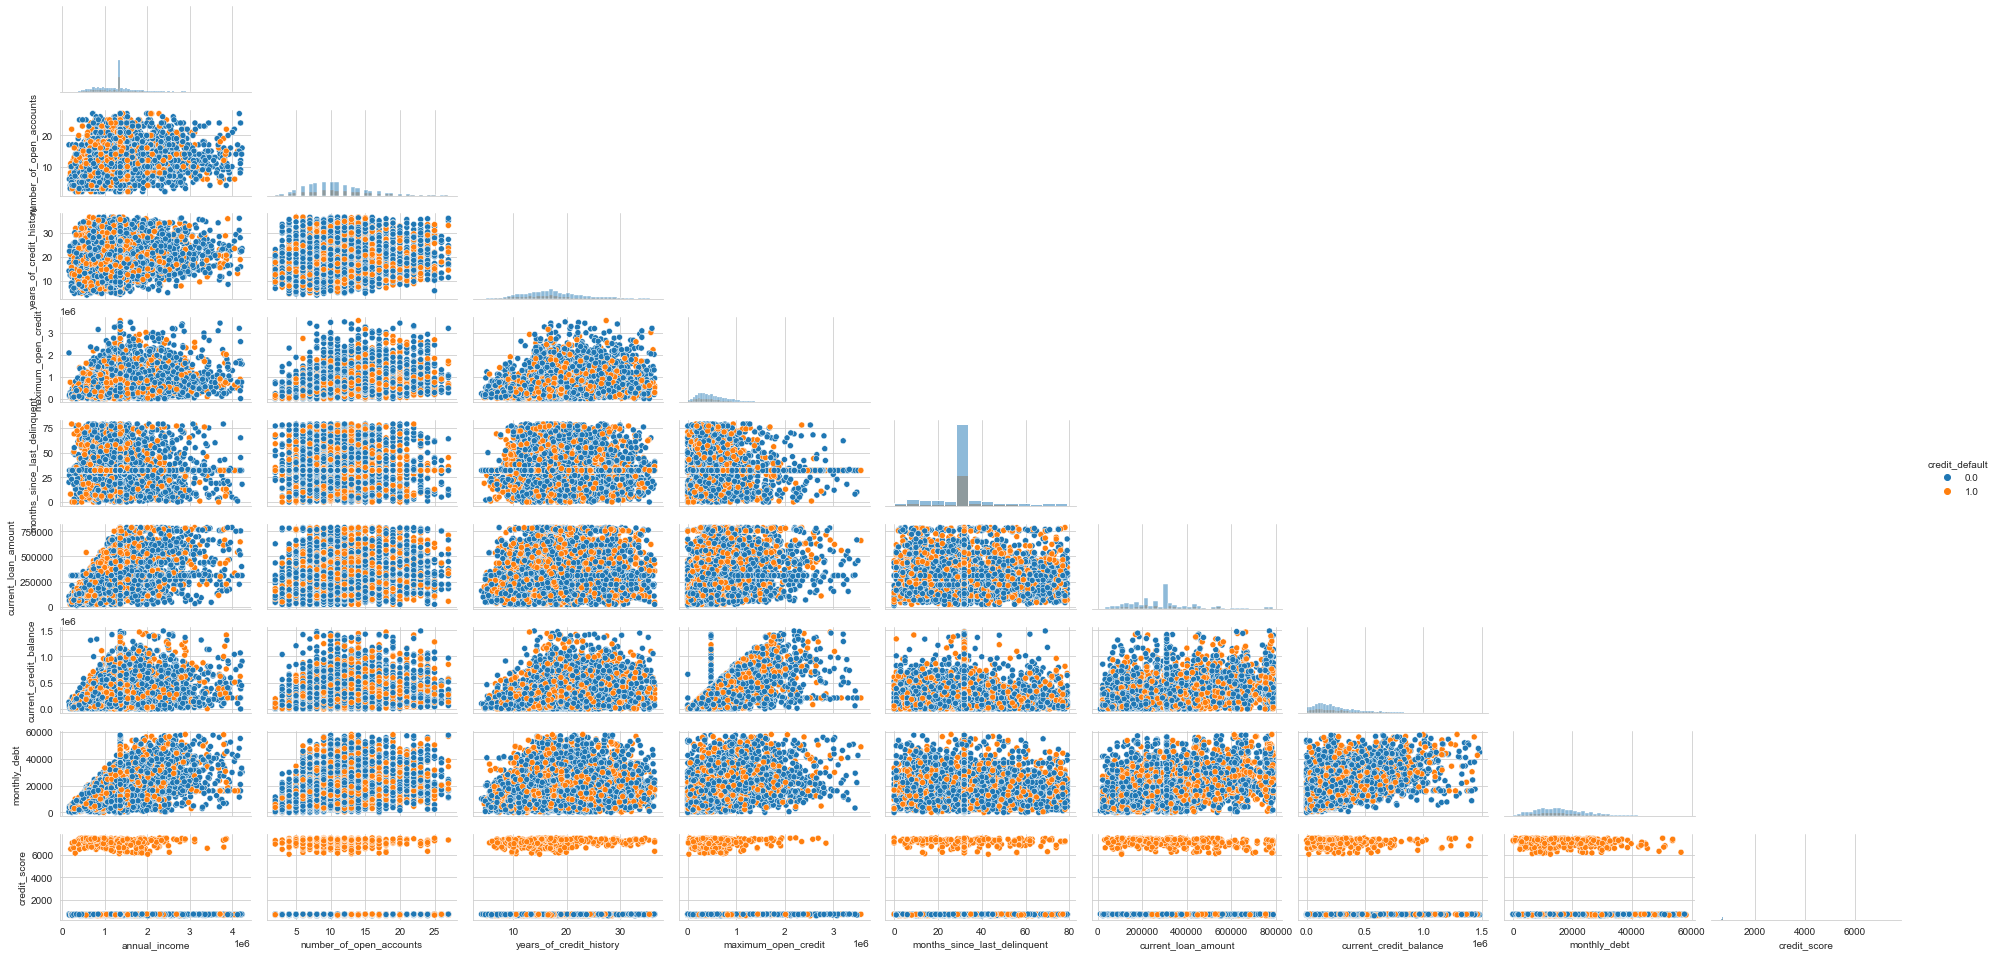

In [118]:
# Постороим график взаимотношения целевой переменной credit_default с колличественными переменными  
sns.pairplot(data=train_data_eda_outliers_num_credit_default, hue="credit_default", height=1.5, aspect=2, corner=True, diag_kind="hist")

Из графика видно, что  сильная положитеьня связь наблюдается с перменной credit_score причем в основной массе со значениями > 5000. 

### _Correlation analysis_

---

Для оценики силы взаимсвязи между переменным построим диагональную корриляционную матрицу. 

<AxesSubplot:>

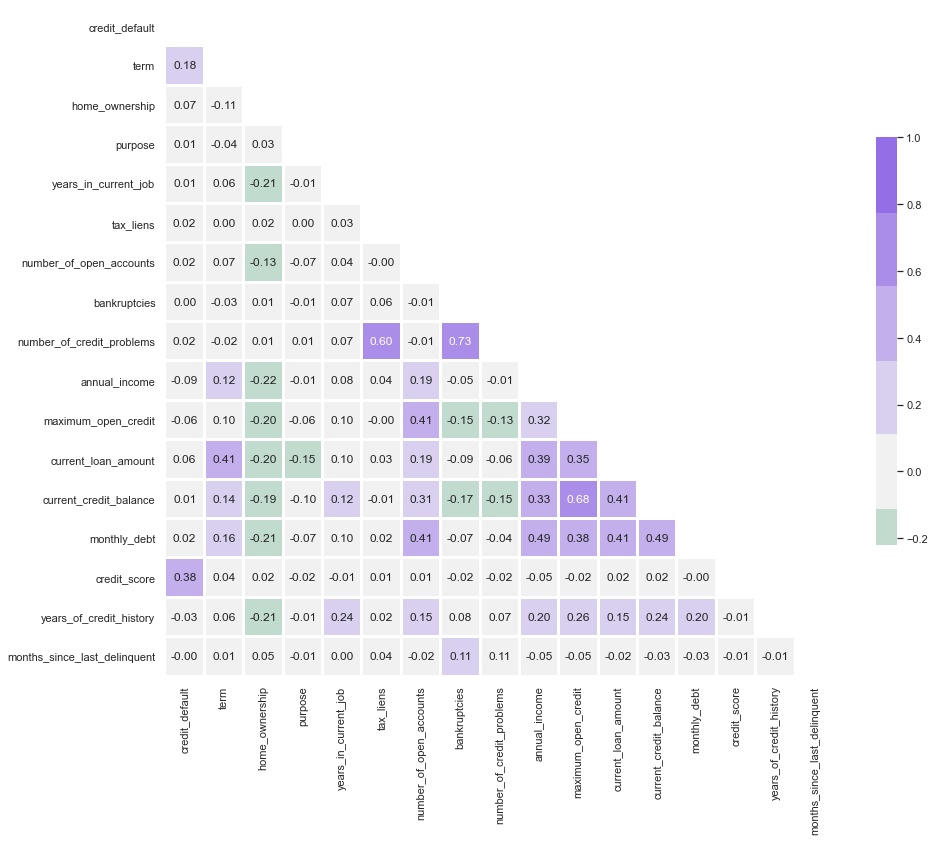

In [119]:
# Постороение диагональной корриляционной матрицы.

sns.set_theme(style="white")

# Compute the correlation matrix
corr = train_data_eda_outliers.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, )

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=2, cbar_kws={"shrink": .5})

Анализ матрици коррляции показывает, что есть значимая корреляция > 0.6 между следующим переменными 

- current_credit_balance и maximum_open_credit
- number_of_credit_problems и tax_liens
- number_of_credit_problems и bankruptcies

Между остальными переменными значимой отрицательно или положительной корреляции не наблюдается. 

<center>

# Section 2. Conclusions

В данной части проекта выполнен разведочный анализ данных. 

1. Определены: 
- Описательные статистики 
- Смещение
- Эксцесс

2. Выполнена оценка распеделения переменных.
Установлено, что практически все колличественные переменные имеют выбросы за исключенем credit_score. В свою очередь credit_score имеет неравномерное распеределение значений. 

Анализ распределения категориальных переменных показывает, что переменные tax_liens, number_of_credit_problems, bunkruptcies имеют незначительные выбросы. С 4 до 8 для tax_liens, с 6 до 8 для number_of_credit_problems и 4 для bunkruptcies. Значения для остальных переменных распеределены относительно равномерно в предалах диапазона изменения переменной.

3. Выполнена фильтрация выпросов 

4. Выполннено исследование взаимоотношений между целевой переменной credit_default остальными переменными.

Установлено, что явных взаимоотношений целевой перменной с другими категориальными переменными не наблюдается.
Выявлено, что наблюдается сильная положитеьня связь целевой переменной с перменной credit_score причем в основной массе со значениями > 5000.

5. Выполнен корриляционный анализ. 

Установлено, что есть значимая корреляция > 0.6 между следующим переменными

current_credit_balance и maximum_open_credit
number_of_credit_problems и tax_liens
number_of_credit_problems и bankruptcies


Между остальными переменными значимой отрицательно или положительной корреляции не наблюдается.

<center>
    
# **STAGE 4. FEATURE ENGINEERING**



### _Imputation_

---

In [120]:
train_data_fe = train_data_eda_outliers

In [121]:
train_data_fe.head().T

0          1          2         3  \
credit_default                    0.00       1.00       0.00      0.00   
term                              0.00       1.00       0.00      0.00   
home_ownership                    1.00       1.00       0.00      1.00   
purpose                           3.00       3.00       3.00      3.00   
years_in_current_job             10.00      10.00       8.00      6.00   
tax_liens                         0.00       0.00       0.00      0.00   
number_of_open_accounts          11.00      15.00      11.00      8.00   
bankruptcies                      1.00       0.00       0.00      1.00   
number_of_credit_problems         1.00       0.00       0.00      1.00   
annual_income                482087.00 1025487.00  751412.00 805068.00   
maximum_open_credit          685960.00 1181730.00 1182434.00 147400.00   
current_loan_amount          309573.00  264968.00  309573.00 121396.00   
current_credit_balance        47386.00  394972.00  308389.00  95855.00   
monthly_debt                   7914.00   18373.00   13651.00  11338.00   
credit_score                    749.00     737.00     742.00    694.00   
years_of_credit_history          26.30      15.30      35.00     22.50   
months_since_last_delinquent     32.00      32.00      32.00     32.00   

                                     4  
credit_default                    0.00  
term                              0.00  
home_ownership                    2.00  
purpose                           3.00  
years_in_current_job              8.00  
tax_liens                         0.00  
number_of_open_accounts          13.00  
bankruptcies                      0.00  
number_of_credit_problems         1.00  
annual_income                776264.00  
maximum_open_credit          385836.00  
current_loan_amount          125840.00  
current_credit_balance        93309.00  
monthly_debt                   7180.00  
credit_score                    719.00  
years_of_credit_history          13.60  
months_since_last_delinquent     32.00

Создадим переменную описывающую оставшиеся свободные средства после уплаты текущего основгого долга по кредиту

In [122]:
# Создание переменной free_balance
train_data_fe['free_balance'] = train_data_fe['annual_income'] / 12 - train_data_fe['monthly_debt']

Описательные статистики:
count     7500.00
mean     92389.03
std      44580.81
min      10294.92
25%      62446.98
50%      88786.70
75%     107582.07
max     335279.08
Name: free_balance, dtype: float64


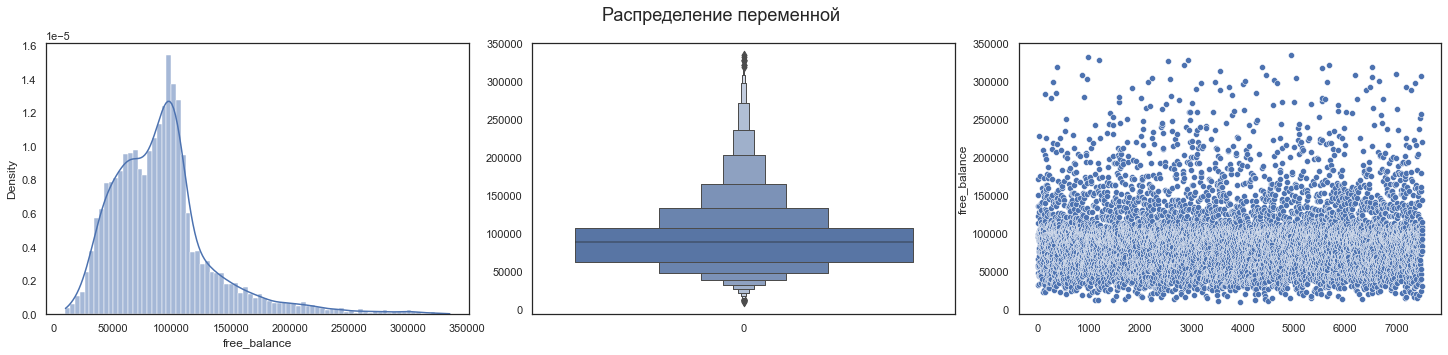

In [123]:
# Оценка распределения перемнной free_balance
distribution_of_quantitative_variables(train_data_fe['free_balance'])

### _Scaling_

---

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
# Список признаков
train_data_fe.columns.tolist()

['credit_default',
 'term',
 'home_ownership',
 'purpose',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'bankruptcies',
 'number_of_credit_problems',
 'annual_income',
 'maximum_open_credit',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'years_of_credit_history',
 'months_since_last_delinquent',
 'free_balance']

In [126]:
# Отбор признков для масштабирования 
feature_names = ['credit_default',
 'term',
 'home_ownership',
 'purpose',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'bankruptcies',
 'number_of_credit_problems',
 'annual_income',
 'maximum_open_credit',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'years_of_credit_history',
 'months_since_last_delinquent',
 'free_balance']

# Удаление из набора признаков целеовой переменной credit_score
feature_names.remove('credit_score')

# Проверека результата 
feature_names

['credit_default',
 'term',
 'home_ownership',
 'purpose',
 'years_in_current_job',
 'tax_liens',
 'number_of_open_accounts',
 'bankruptcies',
 'number_of_credit_problems',
 'annual_income',
 'maximum_open_credit',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'years_of_credit_history',
 'months_since_last_delinquent',
 'free_balance']

In [127]:
# Зададим отдельно целевую переменную 
target_var = train_data_fe['credit_score']

In [128]:
# Отмасштабируем признаки 
train_data_scaling = scaler.fit_transform(train_data_fe[feature_names].astype(float))

# Создадим набор данных с отмасштабированными признаками
train_data_scaling = pd.DataFrame(train_data_scaling, columns=feature_names)

# Проверка результата 
train_data_scaling.head(10).T

0     1     2     3     4     5     6     7  \
credit_default               -0.63  1.60 -0.63 -0.63 -0.63  1.60 -0.63  1.60   
term                         -0.59  1.69 -0.59 -0.59 -0.59  1.69 -0.59 -0.59   
home_ownership                0.06  0.06 -0.99  0.06  1.11  1.11 -0.99  1.11   
purpose                      -0.35 -0.35 -0.35 -0.35 -0.35  2.54  0.61  2.54   
years_in_current_job          1.08  1.08  0.53 -0.02  0.53  0.25  1.08  1.08   
tax_liens                    -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11   
number_of_open_accounts       0.01  0.89  0.01 -0.65  0.45  0.23 -0.43  0.45   
bankruptcies                  2.55 -0.34 -0.34  2.55 -0.34 -0.34 -0.34 -0.34   
number_of_credit_problems     1.66 -0.34 -0.34  1.66  1.66 -0.34 -0.34 -0.34   
annual_income                -1.43 -0.51 -0.97 -0.88 -0.93  0.08  0.32 -0.48   
maximum_open_credit           0.17  1.20  1.20 -0.94 -0.45 -0.49 -0.45 -0.57   
current_loan_amount           0.00 -0.26  0.00 -1.10 -1.07  0.16  0.00 -0.34   
current_credit_balance       -0.98  0.56  0.18 -0.77 -0.78 -0.46 -0.96 -0.80   
monthly_debt                 -0.93  0.06 -0.39 -0.61 -1.00  0.09 -1.46  0.19   
years_of_credit_history       1.37 -0.41  2.78  0.76 -0.68 -0.52  0.40 -0.94   
months_since_last_delinquent -0.06 -0.06 -0.06 -0.06 -0.06 -0.06  2.86 -1.06   
free_balance                 -1.35 -0.57 -0.97 -0.82 -0.78  0.06  0.70 -0.57   

                                 8     9  
credit_default               -0.63  1.60  
term                         -0.59  1.69  
home_ownership               -0.99 -0.99  
purpose                       0.61 -0.35  
years_in_current_job         -0.30 -1.40  
tax_liens                    -0.11 -0.11  
number_of_open_accounts       1.33 -0.21  
bankruptcies                  2.55 -0.34  
number_of_credit_problems     1.66 -0.34  
annual_income                 0.08  0.08  
maximum_open_credit          -1.25 -0.19  
current_loan_amount          -1.05  1.54  
current_credit_balance       -1.19 -0.28  
monthly_debt                 -1.68 -0.01  
years_of_credit_history      -0.34  1.09  
months_since_last_delinquent -0.06 -1.91  
free_balance                  0.48  0.09

<center>
    
# **STAGE 5. TRAIN | TEST SPLIT**

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X = train_data_scaling[feature_names]
y = target_var

In [140]:
X

credit_default  term  home_ownership  purpose  years_in_current_job  \
0              -0.63 -0.59            0.06    -0.35                  1.08   
1               1.60  1.69            0.06    -0.35                  1.08   
2              -0.63 -0.59           -0.99    -0.35                  0.53   
3              -0.63 -0.59            0.06    -0.35                 -0.02   
4              -0.63 -0.59            1.11    -0.35                  0.53   
...              ...   ...             ...      ...                   ...   
7495           -0.63 -0.59            1.11     2.54                 -1.67   
7496            1.60  1.69           -0.99    -0.35                 -1.40   
7497           -0.63 -0.59            1.11    -1.31                 -0.02   
7498           -0.63 -0.59           -0.99    -0.35                  1.08   
7499           -0.63 -0.59            1.11    -0.35                 -0.57   

      tax_liens  number_of_open_accounts  bankruptcies  \
0         -0.11                     0.01          2.55   
1         -0.11                     0.89         -0.34   
2         -0.11                     0.01         -0.34   
3         -0.11                    -0.65          2.55   
4         -0.11                     0.45         -0.34   
...         ...                      ...           ...   
7495      -0.11                    -1.75         -0.34   
7496      -0.11                    -0.21         -0.34   
7497      -0.11                     0.23         -0.34   
7498      -0.11                     2.21         -0.34   
7499      -0.11                    -0.65         -0.34   

      number_of_credit_problems  annual_income  maximum_open_credit  \
0                          1.66          -1.43                 0.17   
1                         -0.34          -0.51                 1.20   
2                         -0.34          -0.97                 1.20   
3                          1.66          -0.88                -0.94   
4                          1.66          -0.93                -0.45   
...                         ...            ...                  ...   
7495                      -0.34          -1.57                -1.03   
7496                      -0.34           0.36                 0.17   
7497                      -0.34           0.95                 2.43   
7498                      -0.34           0.08                 1.11   
7499                      -0.34           0.08                -0.25   

      current_loan_amount  current_credit_balance  monthly_debt  \
0                    0.00                   -0.98         -0.93   
1                   -0.26                    0.56          0.06   
2                    0.00                    0.18         -0.39   
3                   -1.10                   -0.77         -0.61   
4                   -1.07                   -0.78         -1.00   
...                   ...                     ...           ...   
7495                -1.05                   -0.87         -1.50   
7496                 0.79                    0.83         -0.47   
7497                 0.00                    0.93         -0.50   
7498                 1.79                    0.92          1.84   
7499                -1.65                    0.09         -0.82   

      years_of_credit_history  months_since_last_delinquent  free_balance  
0                        1.37                         -0.06         -1.35  
1                       -0.41                         -0.06         -0.57  
2                        2.78                         -0.06         -0.97  
3                        0.76                         -0.06         -0.82  
4                       -0.68                         -0.06         -0.78  
...                       ...                           ...           ...  
7495                    -1.51                         -0.06         -1.36  
7496                     1.40                          0.72          0.51  
7497                     2.31             

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=45)

<center>
    
# **STAGE 6. PICK MODELS**

In [132]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [133]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

#### Logistic regression

In [134]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression( max_iter=1000).fit(X_train, y_train)

In [141]:
y_train_pred = clf1.predict(X_train)
y_test_pred = clf1.predict(X_test)

In [142]:
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

       585.0       0.00      0.00      0.00         1
       586.0       0.00      0.00      0.00         1
       588.0       0.00      0.00      0.00         1
       589.0       0.00      0.00      0.00         1
       590.0       0.00      0.00      0.00         1
       591.0       0.00      0.00      0.00         1
       598.0       0.00      0.00      0.00         1
       599.0       1.00      1.00      1.00         1
       601.0       0.00      0.00      0.00         3
       602.0       1.00      1.00      1.00         1
       604.0       0.00      0.00      0.00         1
       606.0       1.00      1.00      1.00         1
       608.0       0.00      0.00      0.00         3
       609.0       0.00      0.00      0.00         1
       610.0       0.00      0.00      0.00         1
       611.0       0.00      0.00      0.00         2
       612.0       1.00      0.50      0.67         2
       613.0       0

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
f1_score(y_test_pred, y_train_pred, average='weighted')

ValueError: Found input variables with inconsistent numbers of samples: [2250, 5250]

#### Bayesian Regression

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
clf2 = RidgeClassifier().fit(X_train, y_train)

In [ ]:
y_pred = clf2.predict(X_train)
y_true = clf2.predict(X_test)

In [ ]:
f1_score(y_true, y_pred, average='weighted')

#### Stochastic Gradient Descent - SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf3 =  SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train)

In [ ]:
y_pred = clf3.predict(X_train)
y_true = clf3.predict(X_test)

In [ ]:
f1_score(y_true, y_pred, average='weighted')

#### SVM

In [ ]:
from sklearn import svm

In [ ]:
clf4 = svm.SVC().fit(X_train, y_train)

In [ ]:
y_pred = clf4.predict(X_train)
y_true = clf4.predict(X_test)

In [ ]:
f1_score(y_true, y_pred, average='weighted')

#### Nearest Neighbors Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf5 = KNeighborsClassifier(n_neighbors=25).fit(X_train, y_train)

In [ ]:
y_pred = clf5.predict(X_train)
y_true = clf5.predict(X_test)

In [ ]:
f1_score(y_true, y_pred, average='weighted')

#### Decision Trees Classification

In [ ]:
from sklearn import tree 

In [ ]:
 clf6 = tree.DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [ ]:
y_pred = clf6.predict(X_train)
y_true = clf6.predict(X_test)

In [ ]:
f1_score(y_true, y_pred, average='weighted')

<center>
    
# **STAGE 7. MODEL SELECTION AND EVALUATING**

#### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
eclf = VotingClassifier(estimators=[clf1, clf2, clf3, clf4, clf5, clf6], voting='hard')
# eclf = VotingClassifier(
#     estimators=[('lr', clf1), ('br', clf2), ('sgd', clf3), ('svm', clf4) ('nnc', clf5), ('dtc', clf6)], 
#     voting='hard')

In [ ]:
# for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf], ['Logistic Regression', 'Bayesian Regression', 'SGD', 'SVM',
#                                                                    'Nearest Neighbors Classification', 'Decision Trees Classification']):
#     scores = cross_val_score(clf, X, y, scoring='f1_score', cv=5)
#     print("f1_score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [ ]:
from itertools import product

# Plotting decision regions

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(7, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4, clf5, clf6, eclf],
                        ['Logistic Regression', 'Bayesian Regression', 'SGD', 'SVM',
                         'Nearest Neighbors Classification', 'Decision Trees Classification' 'Hard Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

<center>
    
# **STAGE 8. MODEL TUNING**

<center>
    
# **STAGE 9. INTERPRETING THE MODEL RESULTS**